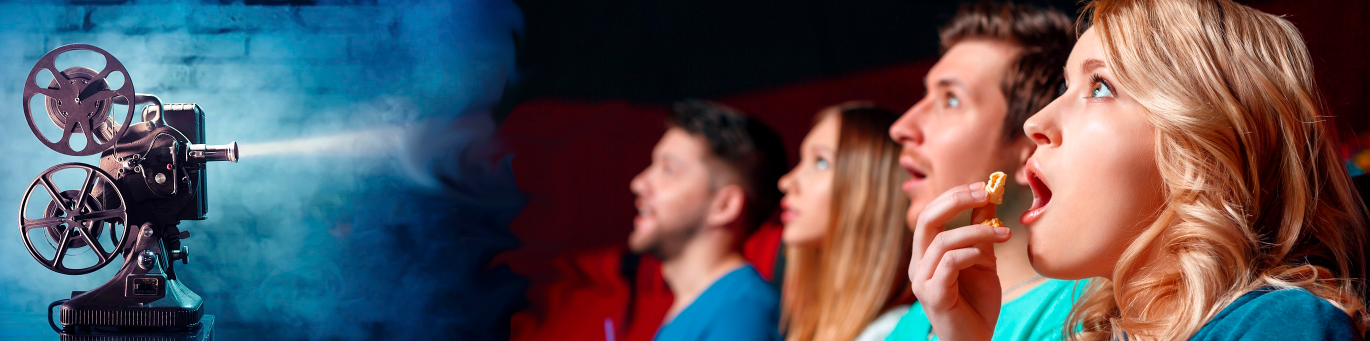

# Исследование данных о российском кинопрокате



**Цель исследования:** \
Изучить рынок российского кинопроката и выявить текущие тренды.<br>
Уделите внимание фильмам, которые получили государственную поддержку. Выяснить насколько такие фильмы интересны зрителю.

Исходная информация:
* `mkrf_movies.csv` - данные о прокатных удостоверениях;\
\-`title` — название фильма;\
\-`puNumber` — номер прокатного удостоверения;\
\-`show_start_date` — дата премьеры фильма;\
\-`type` — тип фильма;\
\-`film_studio` — студия-производитель;\
\-`production_country` — страна-производитель;\
\-`director` — режиссёр;\
\-`producer` — продюсер;\
\-`age_restriction` — возрастная категория;\
\-`refundable_support` — объём возвратных средств государственной поддержки;\
\-`nonrefundable_support` — объём невозвратных средств государственной поддержки;\
\-`financing_source` — источник государственного финансирования;\
\-`budget` — общий бюджет фильма (включает в себя полный объём государственной поддержки; данные указаны только для тех фильмов, которые получили гос. поддержку);\
\-`ratings` — рейтинг фильма на КиноПоиске;\
\-`genres` — жанр фильма.



* `mkrf_shows.csv` - данные о прокате в российских кинотеатрах.\
\-`puNumber` — номер прокатного удостоверения;\
\-`box_office` — сборы в рублях.

**Ход исследования:**
1) обзор данных;\
2) предобработка данных;\
3) исследование данных, проверка гипотезы.

## Открытие файлов с данными и объедините их в один датафрейм

In [1]:
import pandas as pd
from functools import reduce
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# считывание датасетов с учётом места нахождения настоящей тетради
try:
    df  = pd.read_csv('../../04 сборный проект 1/mkrf_movies.csv')
    df2 = pd.read_csv('../../04 сборный проект 1/mkrf_shows.csv')
except:
    try:
        df  = pd.read_csv('/datasets/mkrf_movies.csv')
        df2 = pd.read_csv('/datasets/mkrf_shows.csv')
    except:
        df  = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
        df2 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [3]:
df.info() #общая информация о первом датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df2.info() #общая информация о втором датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Объединение двух датафреймов сделаем по 'puNumber'. Пропусков в столбце нет. Тип в df сделаем int, как в df2.

In [5]:
df[~df['puNumber'].str.isdigit()] # проверка все ли значения 'puNumber' в df в числовом виде

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Вероятно в Паранормальном Якутске пробелы в номере удостоверения. В Курбан-романе заменим "нет" на пропуск NaN. Фильм не может быть без прокатного удостоверения, поэтому номер есть, но из-за какого-то сбоя не вошёл в датасет.

In [6]:
df['puNumber'] = pd.to_numeric(df['puNumber'],errors='coerce') #перевод из текстового формата в числовой

In [7]:
df = df.merge(df2,on='puNumber',how='outer') # слияние двух датасетов с полным включением всех данных

## Предобработка данных

### Проверка типов данных

In [8]:
df.info() # общая информация об объединённом df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
# преобразование 'puNumber' из float64 в Int64; помним, что это тестовый тип и часто приводит к багам
df['puNumber'] = df['puNumber'].astype('Int64')

In [10]:
# преобразование 'show_start_date' из строчного формата в datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'],format='%Y-%m-%dT%H:%M:%S.000Z')

'ratings' должен быть в числовом формате, а не текстовом. <a id='ratings_transform'></a>

In [11]:
df['ratings'].unique() # уникальные значения столбца

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Перевод процентных значений в бальные по 10-тибальной шкале.

In [12]:
# удаление символа '%'; типы рейтинга не перепутаются, т.к. все процентные значения больше 10
def del_percent(x):
    try:
        return x.replace('%','')
    except:
        return float('NaN')
df['ratings'] = df['ratings'].apply(del_percent)

In [13]:
df['ratings'] = df['ratings'].astype('float') # перевод 'ratings' из строчного формата в числовой дробный

In [14]:
df.loc[df['ratings']>10,'ratings'] = df['ratings'][df['ratings']>10]/10 #перевод процентных значений в бальные (/10)

### Пропуски в датафрейме

In [15]:
df_na = df.isna().agg(['sum','mean']).T; df_na.columns = ['sum','share']    # кол-во и доля пропусков до обработки данных
df_na.style.format({'sum':'{:.0f}','share':'{:.2f}'}).background_gradient()

,sum,share
title,0,0.00
puNumber,1,0.00
show_start_date,0,0.00
type,0,0.00
film_studio,18,0.00
production_country,2,0.00
director,9,0.00
producer,568,0.08
age_restriction,0,0.00
refundable_support,7154,0.96


**puNumber**

In [16]:
df.query('puNumber.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),<NA>,2014-05-15 12:00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.loc[df['title'].apply(lambda x: "курбан-роман" in x.lower())] # проверка есть ли ещё "Курбан-роман"

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),<NA>,2014-05-15 12:00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
df = df.dropna(subset=['puNumber']) # удаление задублированной строки с 'Курбан-роман' без номера прокатного удостоверения

**film_studio**

In [19]:
df.query('film_studio.isna()') # фильмы с отсутствием информации о киностудии

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заполним информацию о киностудиях из открытых источников. Некоторые продукты произведены вне киностудий (оставим пропуск).

In [20]:
df.loc[df['title'].apply(lambda x: "мульт личности" in x.lower())].shape[0] # проверка есть ли ещё "Мульт личности"

1

In [21]:
# в Мульт личностях заполняем студию, страну, режиссёра, продюсера
df.loc[df['title']=='Мульт личности. Выпуск 5','film_studio'] = 'Пространство идей, Красный квадрат'
df.loc[df['title']=='Мульт личности. Выпуск 5','production_country'] = 'Россия'
df.loc[df['title']=='Мульт личности. Выпуск 5','director'] = 'Василий Пичул, Юрий Владовский'
df.loc[df['title']=='Мульт личности. Выпуск 5','producer'] = 'Константин Эрнст,Марина Даниелян,Давид Либерман,Даниил Либерман'
df.loc[df['title']=='Stars in Shorts','film_studio'] = 'Biscuit Pictures, Contemptible Entertainment, Mission Filmworks'
df.loc[df['title']=='Несейка. Младшая дочь','film_studio'] = 'Продюсерский центр Молодежные инициативы'
df.loc[df['title']=='Доживем до каникул?..','film_studio'] = 'Творческое объединение RENOVATIO 16'
df.loc[df['title']=='Путешествие в Париж','film_studio'] = 'STRELA'

**production_country**

In [22]:
df.query('production_country.isna()') # фильмы с отсутствием информации о стране производства

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0


In [23]:
df.loc[3186,'production_country'] = 'Россия' # Ералаш производится в России; заполняем пропуск

**producer**

In [24]:
df.query('producer.isna()').head() # фильмы с отсутствием информации о продюсере

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


In [25]:
# долевое распределение стран в срезе без продюсера
df.query('producer.isna()')['production_country'].value_counts(normalize=True).head(10)

СССР              0.603175
Россия            0.065256
Великобритания    0.058201
США               0.042328
СССР              0.035273
Италия            0.028219
Япония            0.017637
Франция           0.014109
Австралия         0.005291
СССР              0.005291
Name: production_country, dtype: float64

БОльшая часть фильмов без указания продюсера произведена в СССР и России. Такая должность отсутствовала в советском кинематографе, а данным функционалом занимался директор картины. В df под 'director' подразумевается режиссёр.\
Меньшая часть фильмов не из СССР, видимо, имеет продюсера, но по каким-то причинам его имя не было указано в df.\
При акцентированной задаче найти закономерности с личностью продюсера можно было бы с помощью открытых источников заполнить данные пропуски, потратив значительное время. Но мы этого делать не будем, поскольку таковой задачи нет и доля пропусков относительно невелика.

**refundable_support, nonrefundable_support, financing_source, budget**

Информация практически отсутствует. Проверим одни ли и те же это строки. Если так, должно быть 7153 строки (7154 - 1 удалённая).

In [26]:
df.query('refundable_support.isna() & nonrefundable_support.isna() & financing_source.isna() & budget.isna()').shape[0]

7153

Проверим гипотезу, что в df отсутствие данных сведений означает однозначное негосударственное финансирование. \
["Редкий отечественный фильм обходится без поддержки государства"](https://www.kinopoisk.ru/media/article/4005463/) - цитата из статьи с Кинопоиска.

In [27]:
df.query('refundable_support.isna()')['production_country'].value_counts().head() #состав стран без финансовой информации

США               2172
Россия            1506
СССР               347
Франция            301
Великобритания     257
Name: production_country, dtype: int64

Большое количество фильмов произведённых в России с отстутствующей информацией о финансировании.\
Кроме того, в данной вырезке есть работы милитаристского типа, например, "Белый тигр" К.Шахназарова. В открытых источниках [указано](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D0%BB%D1%8B%D0%B9_%D1%82%D0%B8%D0%B3%D1%80_(%D1%84%D0%B8%D0%BB%D1%8C%D0%BC,_2012)), что фильм снят киноконцерном «Мосфильм», киностудией «Курьер» при поддержке Министерства культуры РФ и
банка «Держава». Крайне вероятно, что поддержка была финансовой.\
Гипотеза не подтвердилась.

Пропуски заполнить крайне затруднительно, так как источники финансирования и объём невсегда афишируются и могут быть коммерческой информацией; оставляем, как есть.

**ratings, genres**

Близкое число пропусков. Посмотрим связь.

In [28]:
df.query('ratings.isna() & genres.isna()').shape[0] # кол-во строк с одновременным пропуском в 'ratings' и 'genres'

966

Пропуски в 'ratings' и 'genres' в одних и тех же 966 строках. \
В 'genres' на 9 пропусков больше:

In [29]:
df.query('~ratings.isna() & genres.isna()') # строки с пропусками в 'genres', в которых нет пропусков в 'ratings'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.3,NaN,1429859.0
2910,Аномия,111005216,2016-03-11 12:00:00,Художественный,Козлов Владимир Владимирович,Россия,В.Козлов,"Н.Муминова, А.Егай, В.Козлов",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.3,NaN,NaN
3260,Сборник короткометражек Кинотавра 18+,111012916,2016-08-19 12:00:00,Художественный,"ООО ""Кинометр""",Россия,"И.Каграманов, А.Наумов, С.Осипьян, В.Валиуллин...","И.Устинов, И.Каграманов, Е.Филлипова, Г.Стояло...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.2,NaN,1104161.0
3434,Сборник короткого метра. Оскар. Фильмы. 2017,121004117,2017-03-03 12:00:00,Художественный,"Куалиа Филмз, Марвин и Вейн, Эм энд Эм Продакш...",Франция - Испания - Дания - Венгрия - Швейцария,"С.Азази, Х.Г.Пене, К.Дик, Т. вон Гюнтен","С.Азази, Б.Лайарте, Х.Г.Пене, А.Мендиз, К.О.Ад...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,NaN,2322497.0
3439,Семь диких историй,126005916,2016-11-28 12:00:00,Прочие,"Макс Бэйкер, Джон Е.Брайан, Пьер-Луи Гарнон, ...",США - Пуэрто-Рико - Франция,"М.Бэйкер, Д.Е.Брайант, Д.Рондот, Я.Серсар, Д.С...","М.Бэйкер, Д.Е.Брайан, П.-Л.Гарнон, М.Х.Дельгад...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.8,NaN,1025937.0
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.3,NaN,2266408.0
6779,РУССКОЕ КРАТКОЕ. Выпуск 3,111004219,2019-03-15 12:00:00,Художественный,Архангельская Региональная молодежная обществе...,Россия,"С.Сафонова, А.Хмельницкая, А.Сальянов, Н.Назар...","ООО Кинокомпания ""Пионер""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,NaN,NaN
7060,Русское краткое. Выпуск 4,111011419,2019-07-16 12:00:00,Художественный,"ИП Дибцева О.Н., ИП Булгаков Д.А., ООО ""Киноко...",Россия,"О.Дибцева, Д.Булгаков, А.Ильин, А.Шабаров, А.Б...","ООО Кинокомпания ""Пионер""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.2,NaN,NaN
7291,Курьезы,111017619,2019-10-18 12:00:00,Художественный,"АНО ""Кинофорум""",Россия,А.Мышкин,С.Новожилов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,NaN,NaN


Проведённый выше анализ не проявил каких-либо факторов, закономерностей, по которым возможно было бы заполнить пропуски в 'ratings' и 'genres'.\
Вероятно, нет рейтинга по причине непопулярности фильма и отсутствия оценок зрителей. Заполнить пропуски невозможно. Оставляем, как есть.\
Жанр в открытых источниках можно определить, на что уйдёт много времени. Оставляем, как есть.

**box_office** - число пропусков равно разнице числа строк в двух исходных датасетах. То есть фильмов с прокатными удостоверениями на 4328 больше чем фильмов бывших в прокате. Заполнение пропусков невозможно.

In [30]:
# сравнение кол-ва и доли пропусков до/после первой обработки (удаления пропусков)
df_na1 = df.isna().agg(['sum','mean']).T; df_na1.columns = ['sum1','share1']
df_na.join(df_na1).style.format({'sum':'{:.0f}','sum1':'{:.0f}','share':'{:.2f}','share1':'{:.2f}'}).background_gradient()

,sum,share,sum1,share1
title,0,0.00,0,0.00
puNumber,1,0.00,0,0.00
show_start_date,0,0.00,0,0.00
type,0,0.00,0,0.00
film_studio,18,0.00,13,0.00
production_country,2,0.00,0,0.00
director,9,0.00,8,0.00
producer,568,0.08,567,0.08
age_restriction,0,0.00,0,0.00
refundable_support,7154,0.96,7153,0.96


In [31]:
print(f"кол-во пропусков уменьшилось на {round(df_na['sum'].sum()-df_na1['sum1'].sum())} шт. и \
{round((1-df_na1['sum1'].sum()/df_na['sum'].sum())*100)} %")

кол-во пропусков уменьшилось на 17 шт. и 0 %


### Дубликаты в датафрейме

In [32]:
df.duplicated().sum() # кол-во явных строк-дубликатов

0

Изучим каждую метрику. Мугут быть неявные дубликаты - пробелы, регистр написания, опечатки.<br>  Исправим найденные проблемы в отдельных столбцах. После, ещё раз оценим наличие цельных строк-дубликатов.

### Категориальные значения

In [33]:
# кол-во object-ячеек с пробелами по краям значения ячейки
# удаление этих пробелов
whitespace_sum = 0
for c in [i for i in df if df[i].dtype == object]:
    whitespace = df[c][~df[c].isna()].apply(lambda x: not re.match(r'^\S.*\S$',x)).sum()
    whitespace_sum+=whitespace
    print("{:18s} {:>4d}".format(c,whitespace))
    df[c] = df[c].str.strip()
print('\nИтого:            ',whitespace_sum)

title                18
type               1390
film_studio         432
production_country   65
director             58
producer            146
age_restriction       0
financing_source      0
genres                0

Итого:             2109


#### блок ф-ий для обработки категориальных столбцов
В пяти категориальных столбцах (film_studio, production_country, director,	producer, genres) в каждой ячейке присутствует набор уникальных значений.\
Интересно идентифицировать каждое уникальное значение чтобы в дальнейшем определить его популярность (частоту упомянаний).\
Также данная процедура позволит избавиться от пропусков в начале/конце уникального значения, тем самым, вероятно, уменьшится кол-во неявных дубликатов.
Целесообразно сделать функции, которые будут использоваться для обработки всех пяти столбцов.

In [34]:
def value_counts_unique(c,sep=','):
    '''формирование сводной таблицы из Series c подсчётом уникальных значений и их доли
    на входе: Series из строк с уникальными значениями; доп.необяз.параметр - символы-разделители перечисленные через |
    на выходе: DataFrame, где индексы - уникальные значения; 2 столбца - кол-во и доля значений'''
    
    # Series из всех значений, которые были разделены запятой (или др. разделителем)
    se = pd.Series(re.split(sep,(c[~c.isna()]+',').sum())).str.strip()[:-1]
    # df с кол-вом и долей каждого уникального значения
    sum_share = pd.concat([se.value_counts(),se.value_counts(normalize=True)], axis=1)
    sum_share.columns = ['sum','share']
    
    return sum_share

In [35]:
def df_numeric(df):
    '''создание датафрейма на базе другого датафрейма; object-столбцы трансформируются в числовые, ...
    где каждому уникальному значению соответствует своё число; необходимо для определения корреляции'''
    df1 = df.copy()
    for c in [i for i in df1 if df1[i].dtype == object]:
        dict_c = dict((value,key) for key,value in enumerate(df1[c].unique()))
        df1[c] = df1[c].map(dict_c)
    return df1

#### title

In [36]:
# число фильмов с задублированным названием (с учётом регистра, исходное написание)
title_Dupl = df['title'].value_counts()[df['title'].value_counts() > 1]
title_Dupl.index = title_Dupl.index.str.lower()         #прописываем индексы только строчными буквами 
title_Dupl.shape[0]

558

In [37]:
# число фильмов с задублированным названием (без учёта регистра, перевели в строчный формат)
title_dupl = df['title'].str.lower().value_counts()[df['title'].str.lower().value_counts() > 1]
title_dupl.shape[0]

564

In [38]:
# разница в кол-ве дубликатов в 'title' при анализе без и с учётом регистра
title_dupl_diff = pd.DataFrame(title_dupl).join(
                  pd.DataFrame(title_Dupl), how='outer', lsuffix='_dupl',rsuffix='_Dupl').\
                                           query('title_dupl != title_Dupl')
title_dupl_diff

,title_dupl,title_Dupl
атлантида: затерянный мир,2,NaN
борис годунов,2,NaN
доброе утро,4,2.0
доброе утро,4,2.0
зло,2,NaN
игра,3,2.0
короче,2,NaN
тень,2,NaN
ученик чародея,3,2.0
хороший мальчик,2,NaN


Указанные выше фильмы имеют неявные дубликаты из-за типа написания символов (строчный/прописной). То есть, например, в одной строке фильм записан с первой прописной буквой (остальные строчные), а в другой строке тоже самое название записано всеми прописными буквами. \
Найдём данные фильмы и приведём к единому написанию.

In [39]:
df.query('title.str.lower() in @title_dupl_diff.index')['title']

75                  Борис Годунов
183                          ИГРА
827     Атлантида: Затерянный мир
871                           ЗЛО
2981                       КОРОЧЕ
3162               Ученик чародея
3333                         ТЕНЬ
3761              Хороший Мальчик
4075               Ученик Чародея
4253               Ученик Чародея
4680                  Доброе Утро
4762    Атлантида: затерянный мир
5139              Хороший мальчик
5153                  Доброе Утро
5188                  Доброе утро
5221                БОРИС ГОДУНОВ
5319                         ИГРА
5682                       Короче
6036                          Зло
6135                         Игра
6215                     ХРУСТАЛЬ
6417                     Хрусталь
6768                         Тень
7121                  Доброе утро
Name: title, dtype: object

In [40]:
df.loc[183,'title'] = 'Игра'
df.loc[5319,'title'] = 'Игра'
df.loc[871,'title'] = 'Зло'
df.loc[2981,'title'] = 'Короче'
df.loc[3333,'title'] = 'Тень'
df.loc[3761,'title'] = 'Хороший мальчик'
df.loc[4075,'title'] = 'Ученик чародея'
df.loc[4253,'title'] = 'Ученик чародея'
df.loc[4680,'title'] = 'Доброе утро'
df.loc[4762,'title'] = 'Атлантида: Затерянный мир'
df.loc[5153,'title'] = 'Доброе утро'
df.loc[5221,'title'] = 'Борис Годунов'
df.loc[5319,'title'] = 'Игра'
df.loc[6215,'title'] = 'Хрусталь'

Фильмы с одним названием могут быть, как разные, так и один задублированный.\
Задублированные позиции будут удалены ниже в разделе Частичные строки-дубликаты.

<a id='age_restriction'></a>
#### type,  age_restriction,  financing_source

In [41]:
df['type'].value_counts() # уникальные значения типа фильма

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

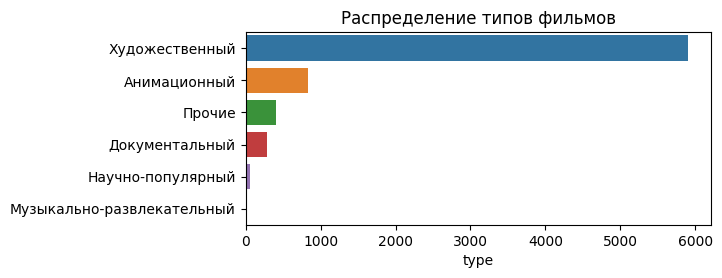

In [42]:
plt.figure(figsize=(6,2.5))
sns.barplot(x=df['type'].value_counts(),y=df['type'].value_counts().index).set(title='Распределение типов фильмов')
plt.show()

In [43]:
df['age_restriction'].value_counts() # уникальные значения возрастной категории

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [44]:
df['age_restriction'] = df['age_restriction'].apply(lambda x: re.match('«.+»',x).group()) # удаление пояснения

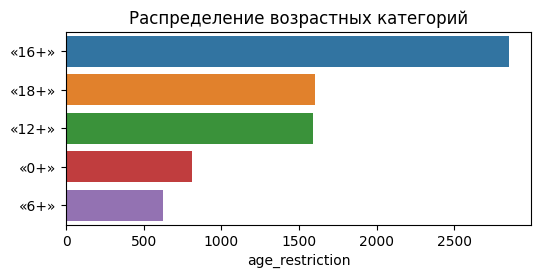

In [45]:
plt.figure(figsize=(6,2.5))
ax = sns.barplot(x=df['age_restriction'].value_counts(),y=df['age_restriction'].value_counts().index).\
set(title='Распределение возрастных категорий')
plt.show()

In [46]:
df['financing_source'].value_counts() # уникальные значения источников финансирования

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

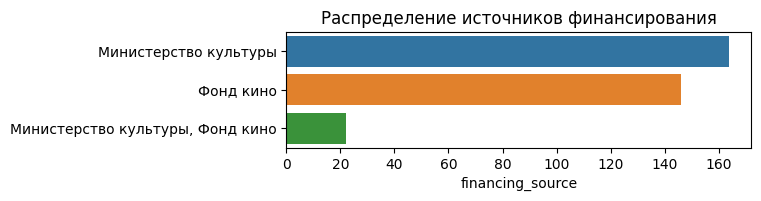

In [47]:
plt.figure(figsize=(6,1.5))
sns.barplot(x=df['financing_source'].value_counts(),y=df['financing_source'].value_counts().index).\
set(title='Распределение источников финансирования')
plt.show()

#### film_studio

In [48]:
df['film_studio'].value_counts().shape[0] # кол-во уникальных ячеек 'film_studio'

5467

In [49]:
df['film_studio'].value_counts().head(10) # кол-во каждой уникальной ячейки 'film_studio' (первые 10 строк)

Киностудия "Мосфильм"                           345
ООО "Мульт в кино"                               75
Анимаккорд Лтд                                   23
ООО "ТаББаК"                                     18
ФГУП "ТПО "Киностудия "Союзмультфильм"           16
ООО "Студия анимационного кино "Мельница"        14
Опус Арте                                        14
Р А И Синема                                     14
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз     13
ООО "Кинокомпания "СТВ"                          13
Name: film_studio, dtype: int64

In [50]:
# формирование свод.табл. с кол-вом и долей фильмов снятых определённой студией (над фильмом могло работать несколько студий)
# удаление пробелов с краёв каждого уникального значения из ячейки (ун.зн-ия разделены запятыми)
film_studio_unique = value_counts_unique(df['film_studio'])

In [51]:
# наиболее востребованные киностудии (1-ые 11 позиций сводной таблицы)
film_studio_unique.head(11).style.format({'share':'{:.2f}'}).background_gradient()

,sum,share
Уорнер Бразерс,429,0.02
"Киностудия ""Мосфильм""",369,0.02
Юниверсал Пикчерз,244,0.01
Канал +,243,0.01
Сине +,148,0.01
ХХ век Фокс,135,0.01
Парамаунт Пикчерз,126,0.01
Нью Лайн Синема,116,0.01
Коламбиа Пикчерз,112,0.01
Уолт Дисней Пикчерз,100,0.00


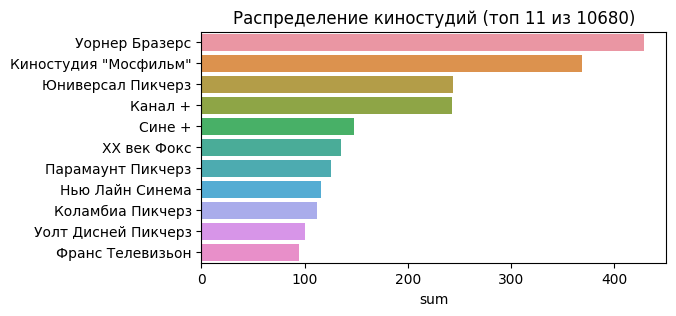

In [52]:
plt.figure(figsize=(6,3))
sns.barplot(x=film_studio_unique.head(11)['sum'],y=film_studio_unique.head(11).index).\
set(title=f'Распределение киностудий (топ 11 из {film_studio_unique.shape[0]})'); plt.show()

Крайне вероятно в списке из более чем 10000 уникальных имён студий наличие неявных дубликатов. Необходимо вручную искать и исправлять, на что уйдёт продолжительное время. Либо, скорее всего, существует метод/инструмент, позволяющий автоматизировать поиск схожих слов, которым я на сегодняшний день не владею. Не ищем неявные дубликаты; предположим, что бОльшая часть написания названия студий корректна. И меньшая неверная часть не внесёт значительное изменение в общее долевое распределение киностудий.

#### production_country

In [53]:
df['production_country'].value_counts().shape[0] # кол-во уникальных ячеек 'production_country'

934

In [54]:
df['production_country'].value_counts().head(10) # кол-во каждой уникальной ячейки 'production_country' (первые 10 строк)

США                     2175
Россия                  1822
СССР                     377
Франция                  302
Великобритания           259
Италия                   131
Германия                 110
США - Великобритания      90
Япония                    77
Испания                   74
Name: production_country, dtype: int64

In [55]:
# формирование свод.табл. с кол-вом и долей фильмов снятых в определённой стране (над фильмом могло работать несколько стран)
# удаление пробелов с краёв каждого уникального значения из ячейки (ун.зн-ия разделены запятыми и тире)
production_country_unique = value_counts_unique(df['production_country'], sep=',|-')

In [56]:
# наиболее плодовитые кино-страны (1-ые 10 позиций сводной таблицы)
production_country_unique.head(10).style.format({'share':'{:.2f}'}).background_gradient()

,sum,share
США,3055,0.30
Россия,1986,0.19
Франция,883,0.09
Великобритания,758,0.07
Германия,443,0.04
СССР,407,0.04
Канада,270,0.03
Италия,251,0.02
Бельгия,195,0.02
Испания,195,0.02


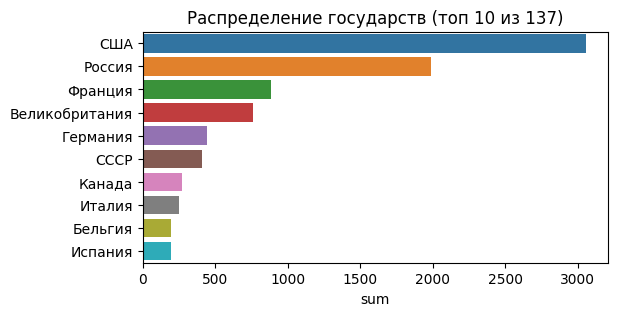

In [57]:
plt.figure(figsize=(6,3))
sns.barplot(x=production_country_unique.head(10)['sum'],y=production_country_unique.head(10).index).\
set(title=f'Распределение государств (топ 10 из {production_country_unique.shape[0]})'); plt.show()

Как не удивительно Россия занимает 2 место. Но это 2-ое место не по сборам, а по количеству фильмов получивших российское прокатное удостоверение.

#### director

In [58]:
df['director'].value_counts().shape[0] # кол-во уникальных ячеек 'director'

4802

In [59]:
df['director'].value_counts().head(10) # кол-во каждой уникальной ячейки 'director' (первые 10 строк)

О.Семёнова          60
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Питер Джексон       13
Клинт Иствуд        13
Вуди Аллен          13
Кевин Смит          12
Люк Бессон          12
Name: director, dtype: int64

In [60]:
# формирование свод.табл. с кол-вом и долей фильмов снятых определёнными режиссёрами (над фильмом могло работать несколько)
# удаление пробелов с краёв каждого уникального значения из ячейки (ун.зн-ия разделены запятыми)
director_unique = value_counts_unique(df['director'])

In [61]:
# наиболее часто упоминаемые режиссёры (1-ые 10 позиций сводной таблицы)
director_unique.head(10).style.format({'share':'{:.2f}'}).background_gradient()

,sum,share
О.Семёнова,60,0.01
А.Миронов,26,0.00
Е.Салабай,20,0.00
Д.Червяцов,20,0.00
Стивен Содерберг,17,0.00
Ридли Скотт,16,0.00
Тиль Швайгер,15,0.00
Е.Головин,13,0.00
Кевин Смит,13,0.00
Питер Джексон,13,0.00


О.Семёнова, А.Миронов,  Д.Червяцов, Е.Салабай, сделали "МУЛЬТ в кино" (105 шт.), "Машкины Cтрашилки" (7 шт.) и другие мультфильмы.

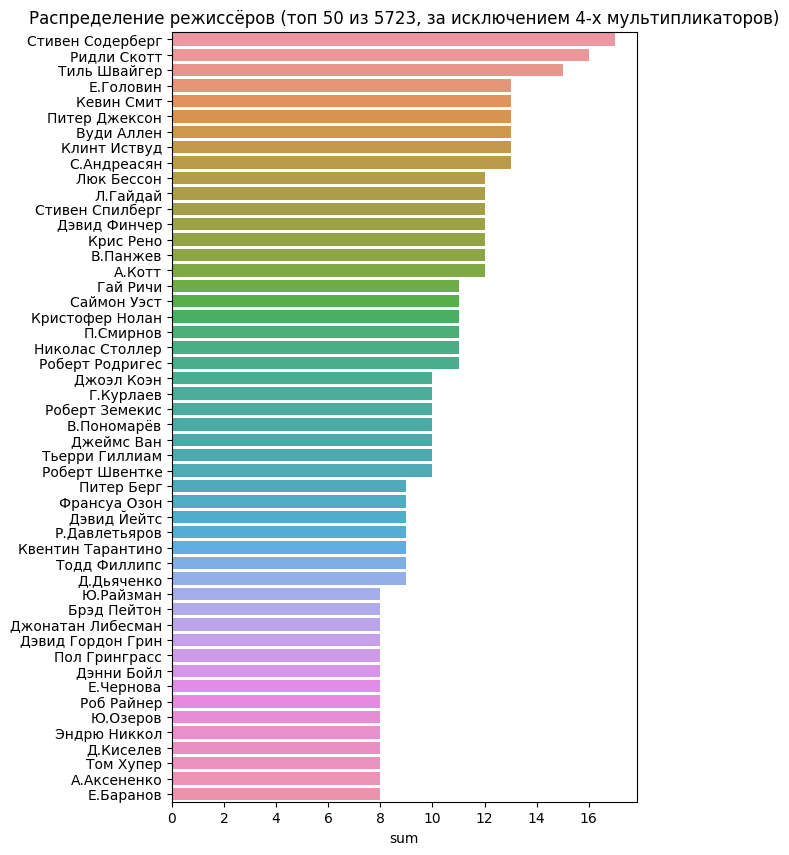

In [62]:
plt.figure(figsize=(6,10))
sns.barplot(x=director_unique.iloc[4:54]['sum'],y=director_unique.iloc[4:54].index).\
set(title=f'Распределение режиссёров (топ 50 из {director_unique.shape[0]}, за исключением 4-х мультипликаторов)'); plt.show()

Судя по фамилиям среди режиссёров наиболее востребованы представители западных стран.

#### producer

In [63]:
df['producer'].value_counts().shape[0] # кол-во уникальных ячеек 'producer'

5335

In [64]:
df['producer'].value_counts().head(10) # кол-во каждой уникальной ячейки 'producer' (первые 10 строк)

П.Смирнов                                        67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина    28
С.Сельянов                                       18
Д.Ловейко, О.Кузовков                            17
А.Тельнов                                        12
Тони Майерс                                      11
Джерри Брукхаймер                                11
Кевин Фейги                                      11
ООО "Продюсерский центр ЕРАЛАШ"                  10
Н.Мокрицкая                                       9
Name: producer, dtype: int64

In [65]:
# формирование свод.табл. с кол-вом и долей фильмов снятых определённым продюсером (над фильмом могло работать несколько)
# удаление пробелов с краёв каждого уникального значения из ячейки (ун.зн-ия разделены запятыми)
producer_unique = value_counts_unique(df['producer'])

In [66]:
# наиболее часто упоминаемые продюсеры (1-ые 10 позиций сводной таблицы)
producer_unique.head(10).style.format({'share':'{:.2f}'}).background_gradient()

,sum,share
С.Сельянов,76,0.00
П.Смирнов,68,0.00
Джейсон Блум,56,0.00
И.Попов,47,0.00
Эрик Феллнер,41,0.00
А.Златопольский,41,0.00
Дмитрий Ловейко,38,0.00
А.Боярский,38,0.00
В.Воля,30,0.00
Тим Беван,30,0.00


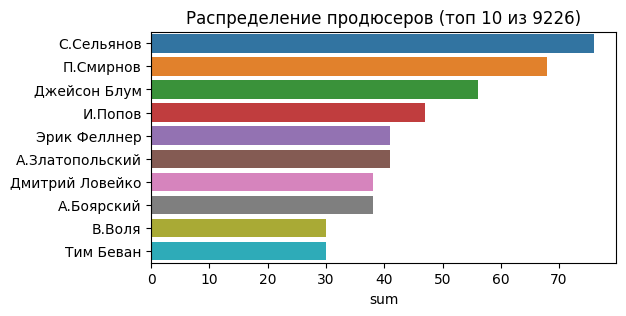

In [67]:
plt.figure(figsize=(6,3))
sns.barplot(x=producer_unique.head(10)['sum'],y=producer_unique.head(10).index).\
set(title=f'Распределение продюсеров (топ 10 из {producer_unique.shape[0]})'); plt.show()

#### genres

In [68]:
df['genres'].value_counts().shape[0] # кол-во уникальных ячеек 'genres' (в каждой ячейки комбинации жанров)

742

In [69]:
df['genres'].value_counts().head(10) # кол-во каждой уникальной ячейки 'genres' (первые 10 строк)

драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
драма,мелодрама              183
драма,комедия                158
триллер,драма,криминал       141
боевик,триллер,драма         140
фантастика,боевик,триллер     88
документальный                84
Name: genres, dtype: int64

In [70]:
# формирование свод.табл. с кол-вом и долей фильмов определённого жанра (фильм может быть нескольких жанров)
# удаление пробелов с краёв каждого уникального значения из ячейки (ун.зн-ия разделены запятыми)
genres_unique = value_counts_unique(df['genres'])

In [71]:
genres_unique.shape[0] # количество упомянутых жанров

29

In [72]:
# наиболее популярные жанры (1-ые 5 позиций сводной таблицы)
genres_unique.head().style.format({'share':'{:.2f}'}).background_gradient()

,sum,share
драма,2912,0.19
комедия,2075,0.14
триллер,1455,0.10
мелодрама,1201,0.08
боевик,1188,0.08


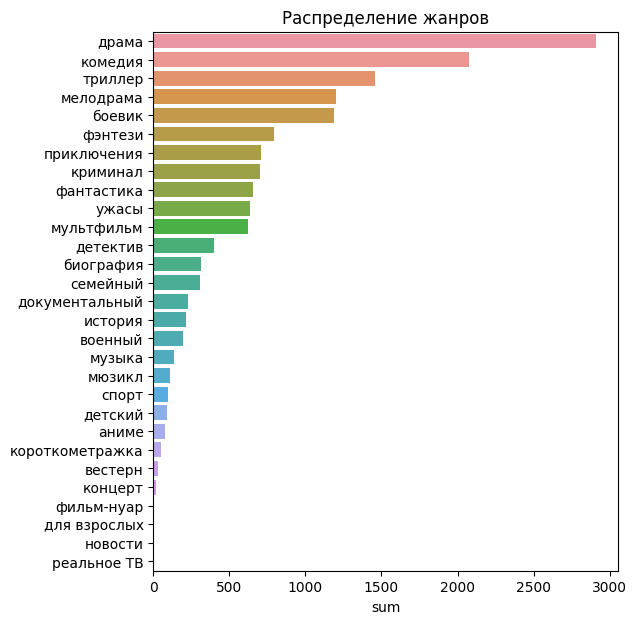

In [73]:
plt.figure(figsize=(6,7))
sns.barplot(x=genres_unique['sum'],y=genres_unique.index).set(title='Распределение жанров'); plt.show()

Среди жанров дубликатов нет.

В категориальных данных встречаются пробелы с краёв уникальных значений. По этой причине возникают неявные дубликаты.\
Также в ряде категориальных столбцов, в их ячейках может быть несколько уникальных значений, разделённых запятой (реже - тире, ещё реже другими символами). \
Удалены пробелы с краёв уникальных значений и определено количество каждого уникального значения.

### Количественные значения

In [74]:
df.describe(include=['int64','float','datetime'],datetime_is_numeric=True) #описание количественных значений

,puNumber,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.485000e+03,7485,3.320000e+02,3.320000e+02,3.320000e+02,6519.000000,3.158000e+03
mean,1.351966e+08,2015-02-20 21:37:43.887775744,1.186446e+07,4.898099e+07,1.272297e+08,6.488173,7.647870e+07
min,1.811096e+06,2010-01-11 12:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120251e+08,2012-07-05 12:00:00,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,2015-03-05 12:00:00,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,2017-11-30 12:00:00,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,2019-12-30 12:00:00,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09
std,3.835292e+07,NaN,2.491656e+07,5.998012e+07,1.885883e+08,1.114638,2.403531e+08


#### puNumber

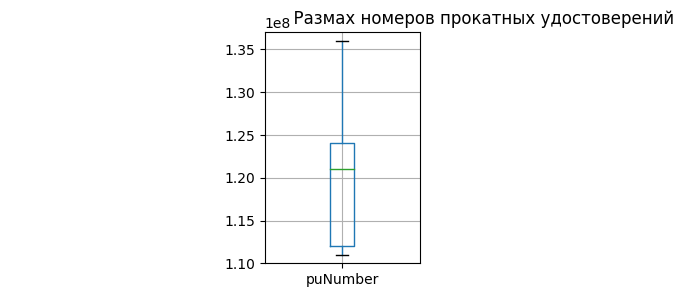

In [75]:
plt.figure(figsize=(2,3)); plt.ylim(1.1*10**8,1.37*10**8)
df.boxplot(column='puNumber')
plt.title('                                                      Размах номеров прокатных удостоверений'); plt.show()

In [76]:
df['puNumber'].value_counts().head(3) # проверка на дубликаты в прокатных удостоверениях

221054410    2
221154310    2
121013618    1
Name: puNumber, dtype: Int64

In [77]:
df.query('puNumber in [221054410,221154310]') # строки с дубликатами по прокатным удостоверениям

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+»,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Ф...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+»,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+»,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+»,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [78]:
df['puNumber'].apply(lambda x: len(str(x))).value_counts() # длина номера прокатного удостоверения

9    7484
7       1
Name: puNumber, dtype: int64

In [79]:
df[df['puNumber'].apply(lambda x: len(str(x))) < 9] # фильм с коротким номером пр.уд.

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4701,1001 рецепт влюбленного кулинара,1811096,2010-12-23 12:00:00,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+»,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN


Подозрительно короткий номер прокатного удостоверения. Вероятно опечатка. Не исправляем. \
Задублированный номер 221154310, видимо, опечатка. Не исправляем. Фильмы разные. \
Задублированный номер 221054410 присвоен одному и тому же фильму.


In [80]:
df.drop(index=5068,inplace=True) # удаление задублированной строки 5068

#### refundable_support,	nonrefundable_support,	budget

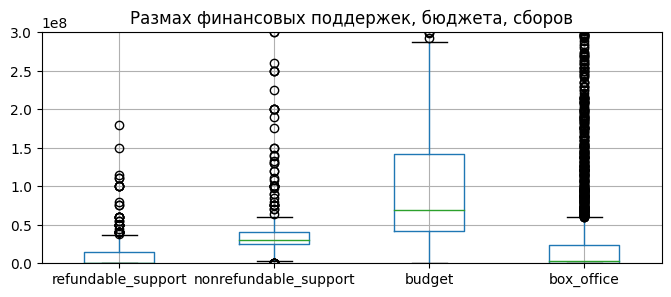

In [81]:
plt.figure(figsize=(8,3)); plt.ylim(0,3*10**8)
df.boxplot(column=['refundable_support', 'nonrefundable_support', 'budget', 'box_office'])
plt.title('Размах финансовых поддержек, бюджета, сборов'); plt.show()

In [82]:
df.query('budget == 0').shape[0] # кол-во фильмов с нулевым бюджетом (что невозможно)

17

In [83]:
df.loc[df['budget']==0,'budget'] = float('NaN') # удаление нулей из 'budget'

Нули в столбцах финансовой поддержки и сборов не противоречат здравому смыслу. Но посмотрим на распределение метрик без нулей: <a id='support'></a>

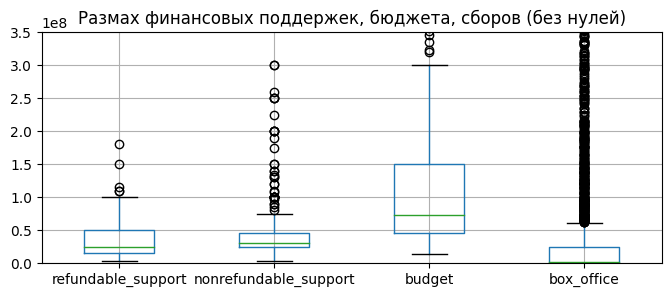

In [84]:
plt.figure(figsize=(8,3)); plt.ylim(0,3.5*10**8)
df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].replace(0, float('NaN')).boxplot()
plt.title('Размах финансовых поддержек, бюджета, сборов (без нулей)'); plt.show()

Медианное значение бюджета выше сумм поддержек. В большинстве случаев при производстве фильмов только государственных денег не хватает и используется частный капиталл. \
Cборы ниже бюджета. Что свидетельствует о неокупаемости большей части фильмов.

In [85]:
# число ненулевых значений финансовых характеристик
for c in ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']:
    print ("{:23s}{:>4d}".format(c,df[~df[c].isna() & df[c] != 0].shape[0]))

refundable_support      111
nonrefundable_support   323
budget                  315
box_office             3134


In [86]:
# описание финансовых характеристик без нулей
df[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].replace(0,float('NaN')).describe()

,refundable_support,nonrefundable_support,budget,box_office
count,1.110000e+02,3.230000e+02,3.150000e+02,3.134000e+03
mean,3.548649e+07,5.034578e+07,1.340961e+08,7.706437e+07
std,3.197288e+07,6.024321e+07,1.912260e+08,2.411784e+08
min,3.500000e+06,3.000000e+06,1.446246e+07,4.000000e+01
25%,1.500000e+07,2.500000e+07,4.615387e+07,1.010288e+05
50%,2.500000e+07,3.000000e+07,7.337955e+07,2.409099e+06
75%,5.000000e+07,4.500000e+07,1.500043e+08,2.456979e+07
max,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


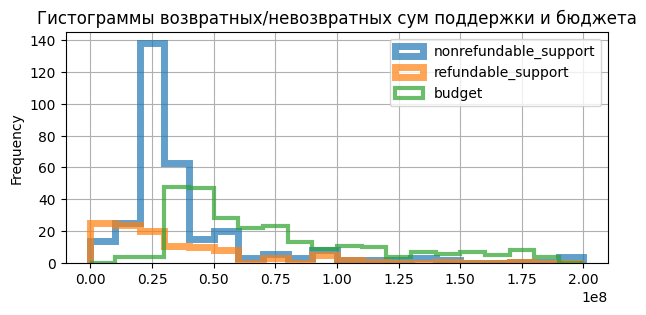

In [87]:
ax = df.plot(kind = 'hist',y='nonrefundable_support',histtype='step',range = (1,2*10**8),bins = 20,linewidth=5,alpha=0.7,
             grid=True,figsize=(7, 3),title='Гистограммы возвратных/невозвратных сум поддержки и бюджета')
df.plot(ax=ax, kind = 'hist',y='refundable_support',histtype='step',range = (1,2*10**8),bins = 20,linewidth=5,alpha=0.7,
        grid=True)
df.plot(ax=ax, kind = 'hist',y='budget',histtype='step',range = (1,2*10**8),bins = 20,linewidth=3,alpha=0.7,grid=True)
plt.show()

Государство чаще оказывает невозвратную финансовую поддержку, чем возвратную. Медиана безвозвратной поддержки 30 млн. руб.;  с обязательством возврата - 25 млн.руб.

In [88]:
# минимальные суммы безвозвратной поддержки (оценка правдоподобности)
df.query('0<nonrefundable_support').sort_values('nonrefundable_support')['nonrefundable_support'].head()

7180    3000000.0
3139    4700000.0
2517    5000000.0
5734    5000000.0
2288    5000000.0
Name: nonrefundable_support, dtype: float64

In [89]:
# фильмы с максимальными суммами безвозвратной поддержки (оценка правдоподобности)
df.sort_values('nonrefundable_support',ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+»,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08
5653,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+»,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09
2920,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+»,50000000.0,392104482.0,635283867.0,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09
6887,Девятая,111007019,2019-09-19 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Н.Хомерики,"С.Мелькумов, А.Роднянский",«16+»,0.0,300000000.0,453704666.0,Фонд кино,5.8,"детектив,триллер,криминал",5.587689e+07


In [90]:
# минимальные суммы возвратной поддержки (оценка правдоподобности)
df.query('0<refundable_support').sort_values('refundable_support')['refundable_support'].head()

2982    3500000.0
5932    5000000.0
3230    5000000.0
3041    5000000.0
7375    5000000.0
Name: refundable_support, dtype: float64

In [91]:
# фильмы с максимальными суммами возвратной поддержки (оценка правдоподобности)
df.sort_values('refundable_support',ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+»,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08
3351,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+»,150000000.0,300000000.0,6.842005e+08,Фонд кино,6.6,драма,3.642851e+08
6472,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+»,115000000.0,0.0,1.855007e+08,Фонд кино,6.5,"мультфильм,приключения,семейный",5.773689e+08
5437,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+»,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези,комедия,семейный",5.117755e+08
3164,Герой (2015),111000416,2016-01-22 12:00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ""...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+»,110000000.0,30000000.0,2.221778e+08,"Министерство культуры, Фонд кино",7.1,"мюзикл,боевик,драма",8.143063e+07


In [92]:
# минимальные суммы бюджета (оценка правдоподобности)
df['budget'].sort_values().head()

3139    14462464.0
7042    15010000.0
5576    18166418.0
3711    18706080.0
2663    27000000.0
Name: budget, dtype: float64

In [93]:
# фильмы с максимальными суммами бюджета (оценка правдоподобности)
df.sort_values('budget',ascending=False).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+»,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08
5437,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+»,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези,комедия,семейный",5.117755e+08
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+»,100000000.0,400000000.0,9.440000e+08,Фонд кино,5.7,"фантастика,боевик",NaN
7171,Грех,111014419,2019-08-31 12:00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+»,0.0,60000000.0,7.799420e+08,Министерство культуры,6.9,"драма,биография,история",5.424320e+07


Суммы финансовых поддержек и бюджета являются правдоподобными. Выбросов нет.

#### 	box_office

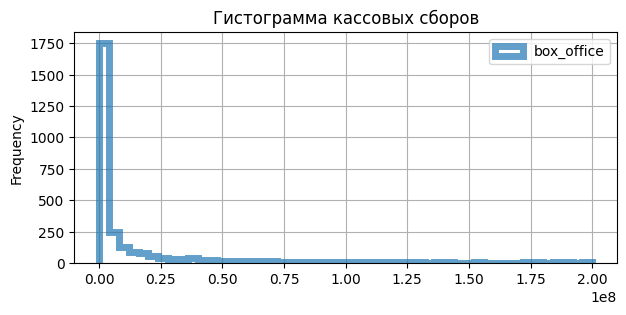

In [94]:
df.plot(kind = 'hist',y='box_office',histtype='step',range = (1,2*10**8),bins = 50,linewidth=5,alpha=0.7,
             grid=True,figsize=(7, 3),title='Гистограмма кассовых сборов'); plt.show()

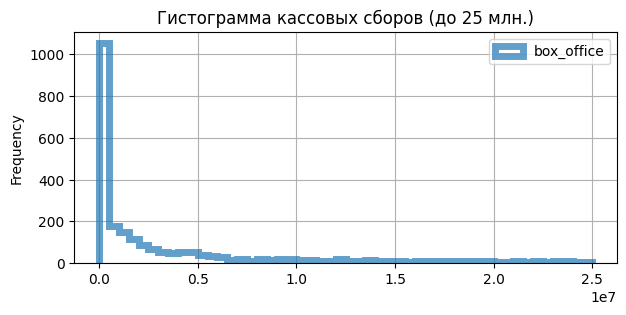

In [95]:
df.plot(kind = 'hist',y='box_office',histtype='step',range = (1,0.25*10**8),bins = 50,linewidth=5,alpha=0.7,
             grid=True,figsize=(7, 3),title='Гистограмма кассовых сборов (до 25 млн.)'); plt.show()

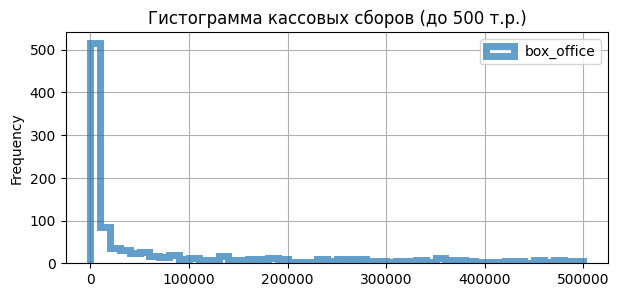

In [96]:
df.plot(kind = 'hist',y='box_office',histtype='step',range = (1,500000),bins = 50,linewidth=5,alpha=0.7,
             grid=True,figsize=(7, 3),title='Гистограмма кассовых сборов (до 500 т.р.)'); plt.show()

Очевидно ненормальное распределение сумм кассовых сборов. На гистограмме пик в левой части с мизерными суммами. Посмотрим меняет ли вид гистограмма от страны производства.

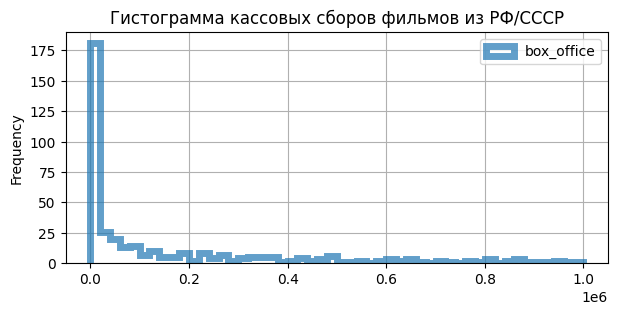

In [97]:
df.query('production_country in ["Россия","CCCР"]')\
  .plot(kind = 'hist',y='box_office',histtype='step', range = (1,1000000),bins = 50,linewidth=5,alpha=0.7,
        grid=True,figsize=(7, 3),title='Гистограмма кассовых сборов фильмов из РФ/СССР'); plt.show()

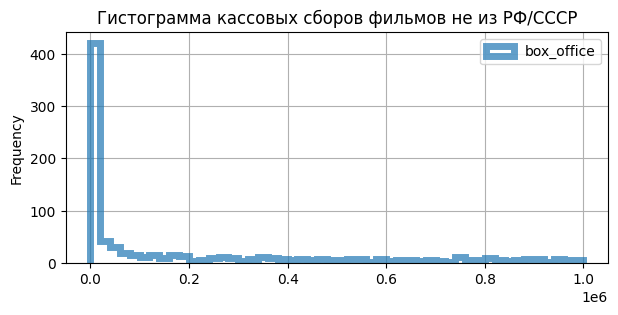

In [98]:
df.query('production_country not in ["Россия","CCCР"]').\
   plot(kind = 'hist',y='box_office',histtype='step',range = (1,1000000),bins = 50,linewidth=5,alpha=0.7,
        grid=True,figsize=(7, 3),title='Гистограмма кассовых сборов фильмов не из РФ/СССР'); plt.show()

In [99]:
# фильмы с минимальными суммами сборов (первый 20)
df[['title','production_country','box_office']].query('0<box_office').sort_values('box_office').head(20)

,title,production_country,box_office
151,Жестокий романс,СССР,40.0
2274,Каменный цветок.,СССР,50.0
3917,22 пули: Бессмертный,Франция,75.0
1180,Астерикс и Обеликс в Британии 3D,Франция-Италия-Испания-Венгрия,80.0
164,За спичками,"СССР, Финляндия",100.0
4063,Ловец ветра,Россия,100.0
211,Одиноким предоставляется общежитие,СССР,100.0
1499,Лучшие дни впереди,Франция,100.0
351,Волшебное приключение,Великобритания - Франция,100.0
1269,Обещание /По произведению Стефана Цвейга/,Франция - Бельгия,100.0


Суммы явно не соответствуют действительности.

Сравним сборы у нескольких фильмов в df и с данными Кинопоиска.

| Индекс | Фильм | Сборы с df (млн.р.) | Сборы с Кинопоиска (млн.р.) | кратность несовпадения |
| --- | --- | --- | --- | --- |
1997 | День дурака |                      0.1 |   69 |   1000 
1655 | Вий 3Д |                           0.1 | 1300 |   10000
1399 | Ёлки 3 |                           0.1 | 1256 |   10000
1793 | Люди Икс: Дни минувшего будущего | 0.1 |  765 |   10000
3516 | Найди меня, если сможешь |         0.1 |    0.3 | 1
1998 | Горько!2 |                         0.1 |  595 |   10000
896	| Гадкий Я 2 |                        0.1 | 1151 |   10000
1836 | Дивергент |                        0.3 |  238 |   1000
2878 | Путешествие из Парижа |            0.3 |    0.4 | 1
3386 | Частное пионерское 3 |             0.3 |    0.3 | 1
3753 | Тайная жизнь домашних животных |   0.6 | 2404 |   1000
836	 | Ледниковый период 4 |              0.6 | 1598 |   1000
2166 | Находка |                          0.9 |    0.6 | 1
2262 | Скольжение |                       0.9 |    0.6 | 1
337	 | Гарри Поттер и Принц-полукровка |  0.9 | 1312 |   100

Суммы указанные в df во многих случаях кратно отличаются от реальных сумм взятых из Кинопоиска. \
Чёткой закономерности величины кратности отличия не прослеживается.\
Исправим сборы у тех нескольких фильмов, где выявились кратные отличия при выборочной проверке:

In [100]:
df.iloc[1997,15] = 69*10**6   # День дурака
df.iloc[1655,15] = 1300*10**6 # Вий 3Д
df.iloc[1399,15] = 1256*10**6 # Ёлки 3
df.iloc[1793,15] = 765*10**6  # Люди Икс: Дни минувшего будущего
df.iloc[1998,15] = 595*10**6  # Горько!2
df.iloc[896,15] = 1151*10**6  # Гадкий Я 2
df.iloc[1836,15] = 238*10**6  # Дивергент
df.iloc[3753,15] = 2404*10**6 # Тайная жизнь домашних животных
df.iloc[836,15] = 1598*10**6  # Ледниковый период 4
df.iloc[337,15] = 1312*10**6  # Гарри Поттер и Принц-полукровка

In [101]:
df.query('0<box_office<=200000').shape[0] # число фильмов со сбором больше 0 и меньше 200000

878

Мало вероятно, что фильм собрал сумму менее 200000 руб. Фильм может вообще не собрать (0 руб), если его не выпускали в прокат. Но если фильм уже выпустили в прокат, то при цене билета в кино 400 руб фильм посетило 500 человек.\
Скорее всего в суммах ошибка либо в размерности, либо в валюте, либо и в том и в другом. Удалим данные значения.

In [102]:
df.loc[(0<df['box_office']) & (df['box_office']<=200000),'box_office'] = float('NaN')

In [103]:
# фильмы с минимальными суммами сборов после удаления "пика" с гистограммы (первый 10)
df[['title','production_country','box_office']].query('box_office>0').sort_values('box_office').head(10)

,title,production_country,box_office
3564,Анимированная жизнь,США,201949.50
5495,Родные,Украина - Германия - Латвия - Эстония,206188.00
5623,Сука-судьба,Франция,213473.00
2462,Сборник российских короткометражных фильмов. Ч...,Россия,214014.50
6437,День Фрирайдера,Россия,214749.00
7480,Акрам Хан: Родом из Карри Хауса,Великобритания,219569.00
3076,Бабоньки,Россия,220536.51
7363,Корпоративные животные,США,220728.00
1815,Семицветик,Россия,223251.00
3640,Районы,Республика Казахстан,226848.00


Суммы соответствуют данным с Кинопоиска.

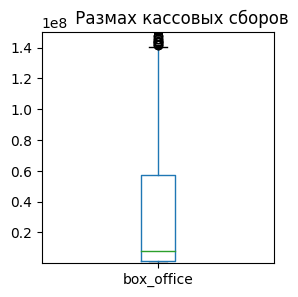

In [104]:
df['box_office'].plot(kind='box',figsize=(3,3),ylim=(1,150*10**6),title='         Размах кассовых сборов'); plt.show()

In [105]:
df['box_office'][df['box_office']>0].describe() # описание кассовых сборов без учёта нулевых

count    2.256000e+03
mean     1.117811e+08
std      2.889757e+08
min      2.019495e+05
25%      1.772506e+06
50%      8.288066e+06
75%      5.799565e+07
max      3.073569e+09
Name: box_office, dtype: float64

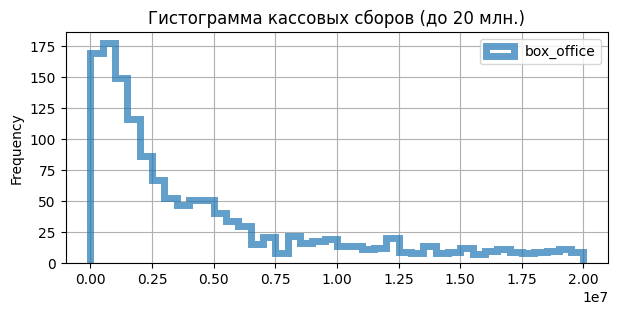

In [106]:
df.plot(kind = 'hist',y='box_office',histtype='step',range = (1,20*10**6),bins = 40,linewidth=5,alpha=0.7,
             grid=True,figsize=(7, 3),title='Гистограмма кассовых сборов (до 20 млн.)'); plt.show()

<a id='box_office_hist'></a>
Пик исчез, но гистограмма всё равно не приобрела нормальный характер.\
Наиболее частый кассовый сбор в российском кинопрокате 1 млн. руб.\
Медиана 8 млн.р., среднее - 100 млн. руб. \
Такая разница между средним и медианой говорит о небольшом количестве работ, ставших шлягерами и собравших большую кассу.Также причиной такой разницы может быть нерепрезентативная выборка (относительно небольшое число данных).

In [107]:
# фильмы с максимальными суммами сборов (оценка правдоподобности)
df[['title','production_country','box_office']].query('0<box_office').sort_values('box_office',ascending=False).head()

,title,production_country,box_office
7456,Холоп,Россия,3.073569e+09
5653,Движение вверх,Россия,2.779686e+09
6820,Мстители: Финал,США,2.576614e+09
3754,Тайная жизнь домашних животных,США,2.404000e+09
6549,Т-34,Россия,2.271754e+09


Данные корректны. Проверено на Кинопоиске.

#### ratings

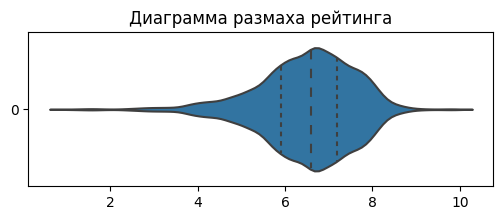

In [108]:
plt.figure(figsize=(6,2))
sns.violinplot(data=df['ratings'],inner='quartile',orient='h')
plt.title('Диаграмма размаха рейтинга'); plt.show()

В рейтинге все значения корректны и близки к нормальному распределению. [Ранее](#ratings_transform) в разделе по проверке типов данных некоторые значения бывшие в процентах переведены в десятибальную систему.

<a id= 'dupl_part'></a>
### Частичные строки-дубликаты

In [109]:
df.drop(columns=['puNumber','show_start_date']).duplicated().sum() # кол-во строк-дубликатов без учёта прокат.уд. и даты

589

Что нам мешает удалить эти 589 дубликатов? Повлияет ли это на исследование?\
Необходимо проверить один ли год у дубликатов. Если разный, удалять нельзя, так как требуется выяснить зависимость от года.

In [110]:
df['year'] = df['show_start_date'].dt.year # создание столбца с годом

In [111]:
# кол-во строк-дубликатов без учёта прокат.уд. и даты премьеры, но с учётом нового столбца с годом
df.drop(columns=['puNumber','show_start_date']).duplicated().sum()

338

In [112]:
# доля строк-дубликатов без учёта прокат.уд. и даты премьеры, но с учётом нового столбца с годом
(df.drop(columns=['puNumber','show_start_date']).duplicated().sum()/df.shape[0]).round(2)

0.05

In [113]:
# проверка наличия кассовых сборов в строках-дубликатах
df[df.drop(columns=['puNumber','show_start_date']).duplicated()]['box_office'].count()

0

Удаляем 338 строк из df. Это 5% от общего числа строк. Теряем данное количество уникальных номеров прокатных удостоверений и дат премьер. <br> 
Для целей анализа эта информация не нужна.

In [114]:
df = df[~df.drop(columns=['puNumber','show_start_date']).duplicated()].copy()   # без "copy" ниже возникнут Warnings

### Создание новых столбцов

Согласно исходному условию главный режиссёр и основной жанр - это первые значения в строках.

In [115]:
df['director_chief'] = df['director'].apply(lambda x: x.split(',')[0]
                                                  if type(x) != float else float('NaN'))  #split не обрабатывает float NaN
df['genre_main']     = df['genres']  .apply(lambda x: x.split(',')[0]
                                                  if type(x) != float else float('NaN'))

In [116]:
df['support_share'] = (df['refundable_support']+df['nonrefundable_support'])/df['budget'] # доля гос.поддержки от бюдж.
df['payback']       = df['box_office']/df['budget']                                       # коэф-нт окупаемости

### Пропуски в датафрейме после предобработки (оценка изменений кол-ва)

In [117]:
# сравнение кол-ва пропусков до и после двух обработок (удаление пропусков и вся предобработка); без учёта новых столбцов
df_na2 = df.drop(columns=['year','director_chief','genre_main','support_share','payback']).isna().agg(['sum','mean']).T
df_na2.columns = ['sum2','share2']
df_na.join(df_na1).join(df_na2).style.format(
    {'sum':'{:.0f}','sum1':'{:.0f}','sum2':'{:.0f}','share':'{:.2f}','share1':'{:.2f}','share2':'{:.2f}'}).background_gradient()

,sum,share,sum1,share1,sum2,share2
title,0,0.00,0,0.00,0,0.00
puNumber,1,0.00,0,0.00,0,0.00
show_start_date,0,0.00,0,0.00,0,0.00
type,0,0.00,0,0.00,0,0.00
film_studio,18,0.00,13,0.00,12,0.00
production_country,2,0.00,0,0.00,0,0.00
director,9,0.00,8,0.00,8,0.00
producer,568,0.08,567,0.08,564,0.08
age_restriction,0,0.00,0,0.00,0,0.00
refundable_support,7154,0.96,7153,0.96,6814,0.95


In [118]:
print(f"кол-во пропусков уменьшилось на {round(df_na['sum'].sum()-df_na1['sum1'].sum())} шт. и \
{round((1-df_na1['sum1'].sum()/df_na['sum'].sum())*100)} % после первичного удаления пропусков")
print(f"кол-во пропусков уменьшилось на {round(df_na['sum'].sum()-df_na2['sum2'].sum())} шт. и \
{round((1-df_na2['sum2'].sum()/df_na['sum'].sum())*100)} % после всей предобработки (относительно исходного df)")

кол-во пропусков уменьшилось на 17 шт. и 0 % после первичного удаления пропусков
кол-во пропусков уменьшилось на 831 шт. и 2 % после всей предобработки (относительно исходного df)


### Вывод
Анализ будет производиться на базе двух файлов, объединённых в 1 датафрейм по номеру прокатного удостоверения.\
Преобразованы типы данных: 'puNumber' из float64 в Int64, 'show_start_date' из строчного формата в datetime, 'ratings' из строчного во float.\
'ratings' приведён к одному 10-ти бальному стандарту оценки (часть данных была в %).\
Число пропусков уменьшино на 2% (через удаление строк-дубликатов, заполнением данных из открытых источников\
Удалено из df 338 строк частичных дубликатов. То есть строки идентичны за исключением номера прокатного удостоверения и точной даты выхода. Для целей нашего анализа эта информация не нужна. Фильмы не удалились, т.к. у фильма может быть несколько прокатных удостоверений.\
В 'title' отредактировано 13 неявных дубликатов.

В столбцах 'film_studio', 'production_country', 'director', 'producer', 'genres' в каждой ячейке присутствует набор уникальных значений. Информация записана в строчном виде и у многих уник.зна-ий по краям есть пробелы (это порождает неявные дубликаты). Все пробелы убраны (не менее 2109; это кол-во ячеек с пробелапми по краям; + ячейки с пробелами внутри промеж уник.зн-ий).\
Топ 3 уникальных значений в категориальных характеристиках:\
\- 'type' - художественный, анимационный, прочие;\
\- 'age_restriction' - 16+,18+,12+;\
\- 'financing_source' - Мин.культуры, Фонд кино, Мин.культ+Ф.кино;\
\- 'film_studio' - Уорнер Бразерс, Мосфильм, Юниверсал Пикчерз; \
\- 'production_country' - США, Россия, Франция;\
\- 'director' (без мультипликаторов) - Стивен Содерберг, Ридли Скотт, Тиль Швайгер;\
\- 'director' - О.Семёнова, А.Миронов, Е.Салабай;\
\- 'producer' - С.Сельянов, П.Смирнов, Джейсон Блум;\
\- 'genres' - драма, комедия, триллер.

Все номера прокатных удостоверений 9-тизначные; один - 7-мизначный. Вероятно опечатка.\
Государство чаще оказывает невозвратную финансовую поддержку, чем возвратную. Медиана безвозвратной поддержки 30 млн. руб.; с обязательством возврата - 25 млн.руб.\
Удалены 878 значений кассовых сборов менее 200 т.руб. \
Наиболее частый кассовый сбор в российском кинопрокате 1 млн. руб. Медиана 8 млн.р., среднее - 100 млн. руб.\
Среднее значение рейтинга фильма - 6,5.

Добавлены новые столбцы: год, главный режиссёр, основной жанр, доля гос.поддержки.

## Исследовательский анализ данных


<a id='numberfilms'></a>
### Число выпускаемых фильмов

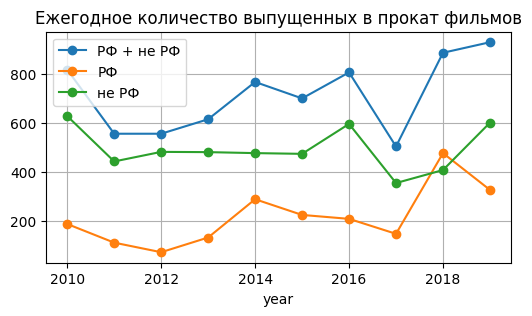

In [119]:
df['year'].value_counts().sort_index().plot(grid=True,title = 'Ежегодное количество выпущенных в прокат фильмов', 
                                            figsize=(6,3),style='o-',legend=True,label='РФ + не РФ'); 
df[['year','production_country']].query('production_country in ["Россия","СССР"]').value_counts('year').sort_index().\
                                            plot(grid=True,style='o-',label='РФ',legend=True)
df[['year','production_country']].query('production_country not in ["Россия","СССР"]').value_counts('year').sort_index().\
                                            plot(grid=True,style='o-',label='не РФ',legend=True); plt.show()

Заметный спад кинопроката в 2017г. Возможно отложенная реакция на [валютный кризис в РФ 2014-2015г](https://ru.wikipedia.org/wiki/%D0%92%D0%B0%D0%BB%D1%8E%D1%82%D0%BD%D1%8B%D0%B9_%D0%BA%D1%80%D0%B8%D0%B7%D0%B8%D1%81_%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8_(2014%E2%80%942015)). Трудно сказать о причинах.

### Доля фильмов с информацией о сборах

In [120]:
(~df['box_office'].isna()).mean() # доля фильмов с указанной информацией о прокате

0.31905961376994124

In [121]:
# доля российских фильмов с указанной информацией о прокате
(~df.query('production_country in ["Россия","СССР"]')['box_office'].isna()).mean()

0.22638064810588773

In [122]:
# доля зарубежных фильмов с указанной информацией о прокате
(~df.query('production_country not in ["Россия","СССР"]')['box_office'].isna()).mean()

0.36004036326942485

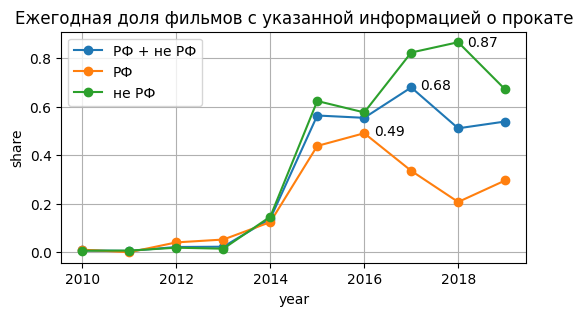

In [123]:
# Series'ы с ежегодными долями известной информации о выручке
all_countries = df.pivot_table(index='year', values='box_office', 
                               aggfunc=lambda x: (~x.isna()).mean()).sort_index()['box_office']
rf = df.query('production_country in ["Россия","СССР"]').pivot_table(index = 'year', values = 'box_office', 
                                                         aggfunc = lambda x: (~x.isna()).mean()).sort_index()['box_office']
abroad = df.query('production_country not in ["Россия","СССР"]').pivot_table(index = 'year', values = 'box_office', 
                                                         aggfunc = lambda x: (~x.isna()).mean()).sort_index()['box_office']
# графики
ax = all_countries.plot(grid=True,title = 'Ежегодная доля фильмов с указанной информацией о прокате', figsize=(6,3),
                        style='o-',legend=True, label='РФ + не РФ')
rf.plot(grid=True,figsize=(6,3),style='o-',legend=True, ax=ax,label='РФ')
abroad.plot(grid=True,label='не РФ', figsize=(6,3),style='o-',legend=True, ax=ax)

ax.annotate(all_countries.max().round(2), xy=(2017.2, 0.67))
ax.annotate(rf.max().round(2), xy=(2016.2, 0.48))
ax.annotate(abroad.max().round(2), xy=(2018.2, 0.85))
ax.set_ylabel('share'); plt.show()

Данные о сборах начали фиксироваться в 2013-2014 годах. Начиная с 2015г. значительный рост учёта информации о сборах.\
По всем фильмам больше всего информации было в 2017г. - 68%; по российским в 2016г. - 49%; по зарубежным в 2018 - 87%.\
Учёт по зарубежным фильмов выше, так как они чаще показываются на большом экране, являются более популярными. Многие отечественные продукты из df не выходят на большой экран, показываются только по телевизору, в учёт по сборам не попадают.

### Финансовая динамика проката

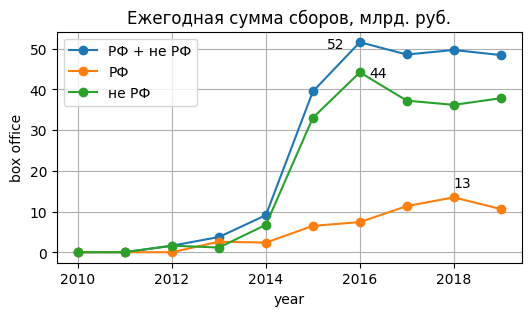

In [124]:
all_countries = df.groupby('year').sum()['box_office']/10**9
rf            = df.query('production_country in ["Россия","СССР"]').groupby('year').sum()['box_office']/10**9
abroad        = df.query('production_country not in ["Россия","СССР"]').groupby('year').sum()['box_office']/10**9

ax = all_countries.plot(grid=True,title = 'Ежегодная сумма сборов, млрд. руб.',
                                                 figsize=(6,3),style='o-',legend=True,label='РФ + не РФ')
rf.plot(grid=True,figsize=(6,3),style='o-',legend=True,label='РФ')
abroad.plot(grid=True,figsize=(6,3),style='o-',legend=True,label='не РФ')

ax.annotate(f'{all_countries.max():.0f}', xy=(2015.3, 50))
ax.annotate(f'{rf.max():.0f}', xy=(2018, 16))
ax.annotate(f'{abroad.max():.0f}',xy=(2016.2, 43)); 
ax.set_ylabel('box office'); plt.show()

Максимальная сумма сборов в 2016г. Основную кассу делают зарубежные фильмы. Российские фильмы достигли пика в 2018г.

In [125]:
# средняя и медианная сумма сборов для каждого года
box_office_mean_median = df.pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean','median'])
box_office_mean_median.columns=['mean','median']
box_office_mean_median.style.format('{:.0f}').background_gradient()

,mean,median
year,,
2010,282005,0
2011,4300278,860810
2012,133549446,308916
2013,266701317,572191
2014,85913785,1808300
2015,99983027,9977812
2016,115383379,8139192
2017,141580810,11031012
2018,109637539,10583414


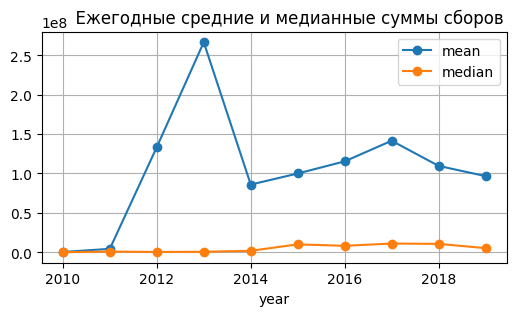

In [126]:
box_office_mean_median.plot(grid=True,title='      Ежегодные средние и медианные суммы сборов',figsize=(6,3),style='o-')
plt.show()

Среднее значение ежегодного сбора значительно выше медианного по причине наличия выбросов - единичных блокбастеров, сделавших большую кассу. Основная же масса фильмов получают выручку значительно ниже выручки единично-успешных фильмов.\
Это также подтверждается гистограммой кассовых сборов, о чём упоминалось [выше](#box_office_hist).\
В 2013 году выброс среднего. Выше на графике суммы сборов видим, что фиксирование информации началось с 2014-2015 годов. Поэтому из-за малой нерепрезентативной выборки на этот единичный выброс можно не обращать внимания. Тем более, что по медиане выброса нет.

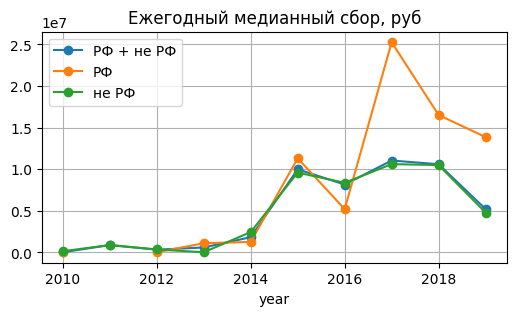

In [127]:
df.groupby('year').median()['box_office'].plot(grid=True,title = 'Ежегодный медианный сбор, руб',
                                               figsize=(6,3),style='o-',legend=True,label='РФ + не РФ')
df.query('production_country in ["Россия","СССР"]').groupby('year').median()['box_office']\
  .plot(grid=True,figsize=(6,3),style='o-',legend=True,label='РФ')
df.query('production_country not in ["Россия","СССР"]').groupby('year').median()['box_office']\
  .plot(grid=True,figsize=(6,3),style='o-',legend=True,label='не РФ'); plt.show()

Медианные значения сборов всех фильмов практически совпадают со значением зарубежных фильмов. Связано с тем, что на большой экран выходят в основном зарубежные филмы и касса делается с них.\
Медианный сбор российских фильмов зигзагообразного типа, что говорит о нестабильности качества российского кинематографа.

### Влияние возрастного ограничения на сборы

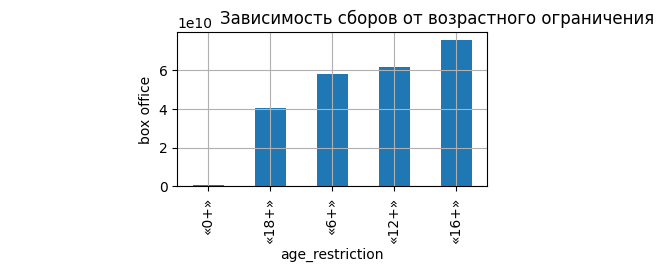

In [128]:
ax = df.query('2015<=year<=2019').groupby('age_restriction')['box_office'].sum().sort_values()\
                                 .plot(kind='bar',figsize=(4,2),grid=True)
ax.set_title(' '*40+'Зависимость сборов от возрастного ограничения')
ax.set_ylabel('box office'); plt.show()

Больше всего денег собрали фильмы "16+". \
"12+" и "6+" - примерно на одном уровне. \
"18+" - на предпоследнем месте.

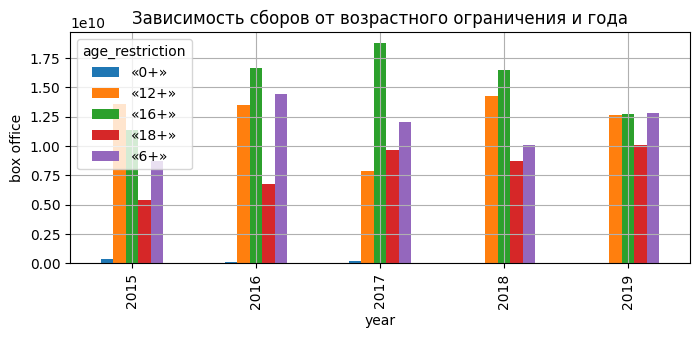

In [129]:
ax = df.query('2015<=year<=2019').pivot_table(index='year',columns='age_restriction',\
  values='box_office',aggfunc='sum').plot(kind='bar',figsize=(8,3),grid=True,\
  title = 'Зависимость сборов от возрастного ограничения и года')
ax.set_ylabel('box office'); plt.show()

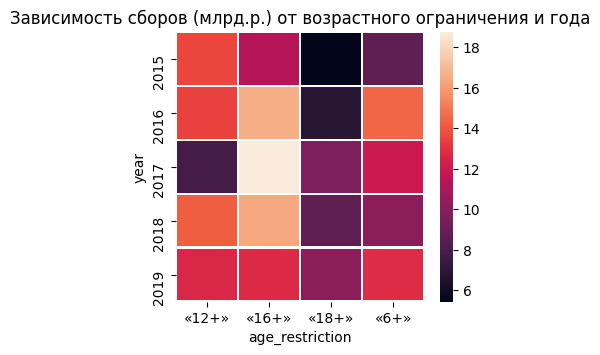

In [130]:
plt.figure(figsize=(4,3.5))
sns.heatmap(df.query('2015<=year<=2019 & age_restriction != "«0+»"')\
   .pivot_table(index='year',columns='age_restriction',values='box_office',aggfunc='sum')/10**9,linewidth=1); 
plt.title('Зависимость сборов (млрд.р.) от возрастного ограничения и года'); plt.show()

В разрезе лет больше всего денег приносят также фильмы "16+". \
Но второе с третьем места меняются периодически позициями - "12+"/"6+".<br>
В аутсайдерах "0+". Это мультфильмы для малышей; не пользуются популярностью на большом экране.\
На втором месте с конца "18+". Количество данных фильмов большое, но вероятно они не являются блок-бастерами.

Получившиеся распределения по сумме сборов во многом определены [количеством](#age_restriction) фильмов определённой фозрастной категории.\
Изучим медианные значения.

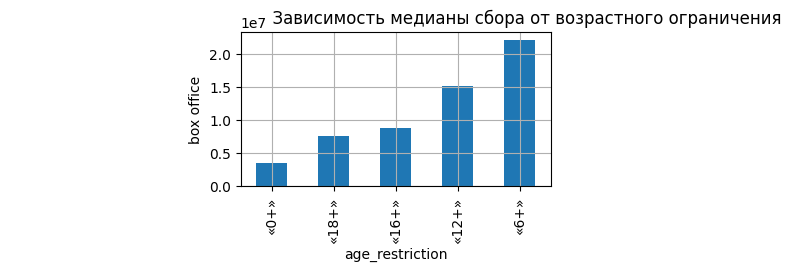

In [131]:
ax = df.query('2015<=year<=2019').groupby('age_restriction')['box_office'].median().sort_values()\
  .plot(kind='bar',figsize=(4,2),grid=True)
ax.set_title(' '*50+'Зависимость медианы сбора от возрастного ограничения')
ax.set_ylabel('box office'); plt.show()

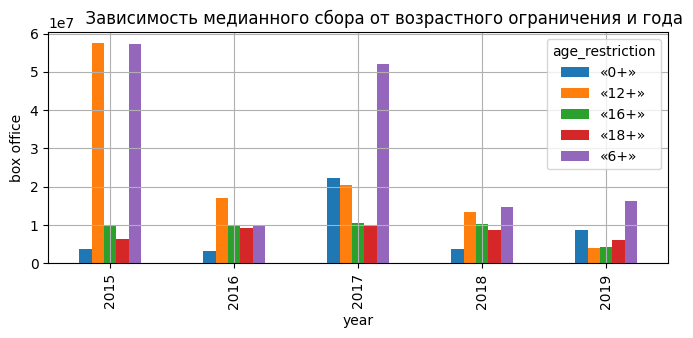

In [132]:
ax = df.query('2015<=year<=2019').pivot_table(index='year',columns='age_restriction',\
  values='box_office',aggfunc='median').plot(kind='bar',figsize=(8,3),grid=True,\
  title = '          Зависимость медианного сбора от возрастного ограничения и года')
ax.set_ylabel('box office'); plt.show()

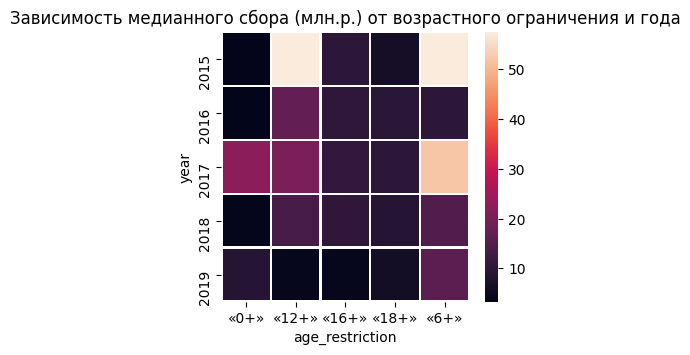

In [133]:
plt.figure(figsize=(4,3.5))
sns.heatmap(df.query('2015<=year<=2019').pivot_table(index='year',columns='age_restriction',\
  values='box_office',aggfunc='median')/10**6,linewidth=1); 
plt.title('Зависимость медианного сбора (млн.р.) от возрастного ограничения и года'); plt.show()

Фильмы с наибольшим медианным сбором - детские "6+".  Следующие места периодически чередуются. Видимо такие продукты пользуются наибольшим спросом, и для родителей с детьми это один из самых простых и доступных способов развлечь ребёнка.

В первую очередь чередование места (кроме 1-ого) в зависимости от года связано с выходом определённых блокбастеров в тот или иной год, которые имеют различные возрастные ограничения.

### Жанры наиболее востребованные

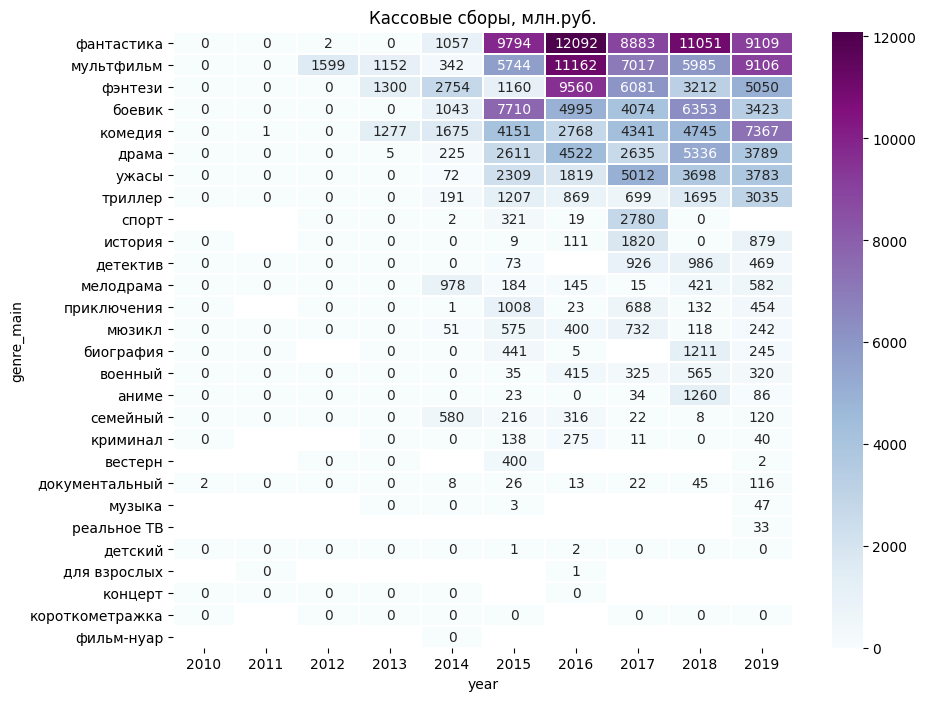

In [134]:
genre_box = df.pivot_table(index='genre_main',columns='year',values='box_office',aggfunc='sum')/10**6
plt.figure(figsize=(10,8))
sns.heatmap(genre_box.reindex(genre_box.sum(1).sort_values(ascending=False).index),
    linewidth=1,annot=True,fmt='.0f',cmap="BuPu"); plt.title('Кассовые сборы, млн.руб.'); plt.show()

Топ 5 жанров: фантастика, мультфильм, фэнтези, боевик, комедия.

### Фильмы, получившие государственную поддержку

Финансовые показатели государственной поддержки: диапазоны размаха, медианы, средние - были изучены [выше](#support).

#### Доля гос. поддержки

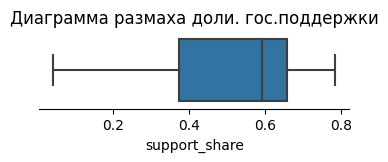

In [135]:
plt.figure(figsize=(4,1))
sns.boxplot(data=df.query('~support_share.isna()'),x='support_share',orient='h').set_yticks([])
plt.title('Диаграмма размаха доли. гос.поддержки'); sns.despine(left=True); plt.show()

In [136]:
df['support_share'].describe() # описание данных гос.поддержки

count    315.000000
mean       0.517386
std        0.170043
min        0.044043
25%        0.373458
50%        0.592265
75%        0.656931
max        0.784745
Name: support_share, dtype: float64

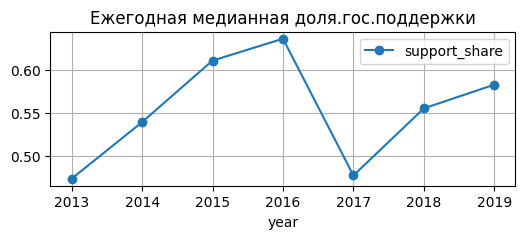

In [137]:
df.pivot_table(index='year',values=['support_share'],aggfunc='median')\
  .plot(grid=True,title = 'Ежегодная медианная доля.гос.поддержки', figsize=(6,2),style='o-'); plt.show()

Спад доли гос.поддержки в 2017-ом. Схожее падение количества выпускаемых фильмов в 2017-ом наблюдали [выше](#numberfilms).

#### Ежегодные суммы гос.поддержки

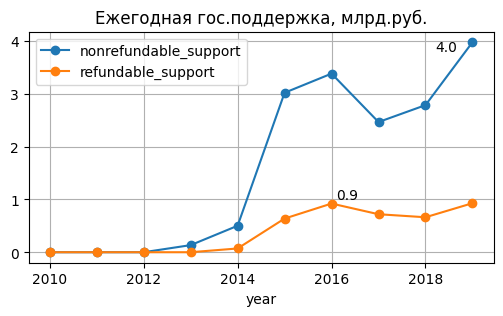

In [138]:
year_support = df[['year','refundable_support','nonrefundable_support']].replace(0, float('NaN'))\
                 .pivot_table(index='year',values=['refundable_support','nonrefundable_support'],aggfunc='sum')/10**9

ax = year_support.plot(grid=True,title = 'Ежегодная гос.поддержка, млрд.руб.', figsize=(6,3),style='o-')
ax.annotate(year_support['nonrefundable_support'].max().round(1), xy=(2018.2, 3.8))
ax.annotate(year_support['refundable_support']   .max().round(1), xy=(2016.1, 1))

plt.show()

Самая большая гос.поддержка была в 2019г. в общей сумме около 5 млрд.руб.

#### Коэффициент окупаемости

`К-нт окупаемости  =  Кассовый сбор / Бюджет`\
Так как данные в столбце бюджет указаны только для фильмов с гос.поддержкой, к-нт окупаемости будет рассчитан только для таких фильмов.

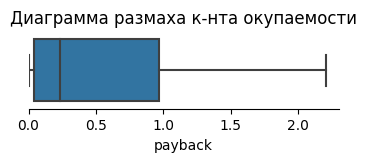

In [139]:
plt.figure(figsize=(4,1));  plt.xlim(0, 2.3)
sns.boxplot(data=df,x='payback',orient='h').set_yticks([])
plt.title('Диаграмма размаха к-нта окупаемости'); sns.despine(left=True); plt.show()

In [140]:
df['payback'].describe() # описание данных к-нта окупаемости

count    269.000000
mean       0.853921
std        1.747902
min        0.002576
25%        0.037447
50%        0.230178
75%        0.966805
max       19.209804
Name: payback, dtype: float64

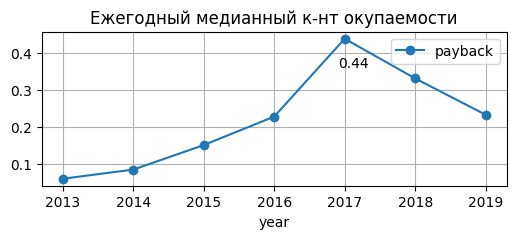

In [141]:
ax = df.pivot_table(index='year',values=['payback'],aggfunc='median')\
       .plot(grid=True,title = 'Ежегодный медианный к-нт окупаемости', figsize=(6,2),style='o-')
ax.annotate('0.44', xy=(2016.9, 0.36)); plt.show()

В большей части фильмы с гос.поддержкой не окупаются. Медиана к-нта окупаемости 0,23.\
В 2017 пик окупаемости при минимальной доле гос.поддержки. Вероятно, в этот период дефицитные средства выделяли только на проекты с высокой вероятностью окупаемости.

#### Влияние гос.поддержки на рейтинг

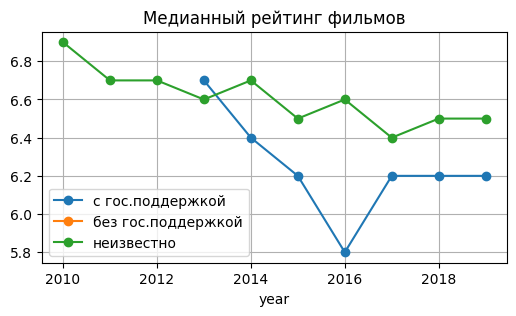

In [142]:
df.query('refundable_support>0 | nonrefundable_support>0').groupby('year')['ratings'].median()\
  .plot(style='o-',grid=True, title = 'Медианный рейтинг фильмов',figsize=(6,3),legend=True,label='с гос.поддержкой')

df.query('refundable_support==0 & nonrefundable_support==0').groupby('year')['ratings'].median()\
  .plot(style='o-',grid=True,figsize=(6,3),legend=True,label='без гос.поддержкой')

df.query('(refundable_support.isna() & nonrefundable_support.isna())|\
          (refundable_support.isna() & nonrefundable_support==0)|\
          (refundable_support==0 & nonrefundable_support.isna())').groupby('year')['ratings'].median()\
  .plot(style='o-',grid=True,legend=True,label='неизвестно')

plt.show()

Фильмы с гос.поддержкой меньше нравятся зрителям, чем фильмы не финансируемые государством.\
Ленты с отсутствием информации о гос.поддержке (зелёная линия) вероятнее не финансировались государством, так как вряд ли при обратном это значение не было бы заполнено государственной структурой, отвечающей за сводные таблички 🙂

### Взаимосвязь различных метрик

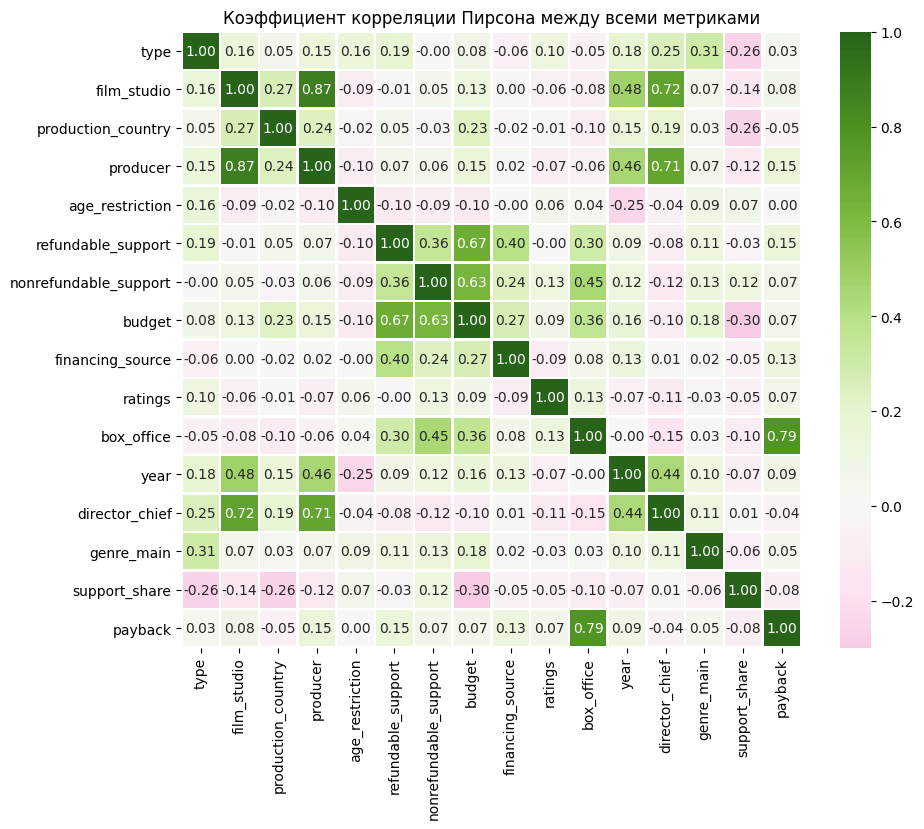

In [143]:
# для определения корреляции в т.ч. с категориальными значениями исходный df преобразуем в полностью числовой через df_numeric
plt.figure(figsize=(10,8))
sns.heatmap(
    df_numeric(df.drop(columns=['puNumber','director','genres','title'])).corr(), 
    linewidth=1,annot=True,fmt='.2f',cmap='PiYG',center= 0)
plt.title('Коэффициент корреляции Пирсона между всеми метриками'); plt.show()

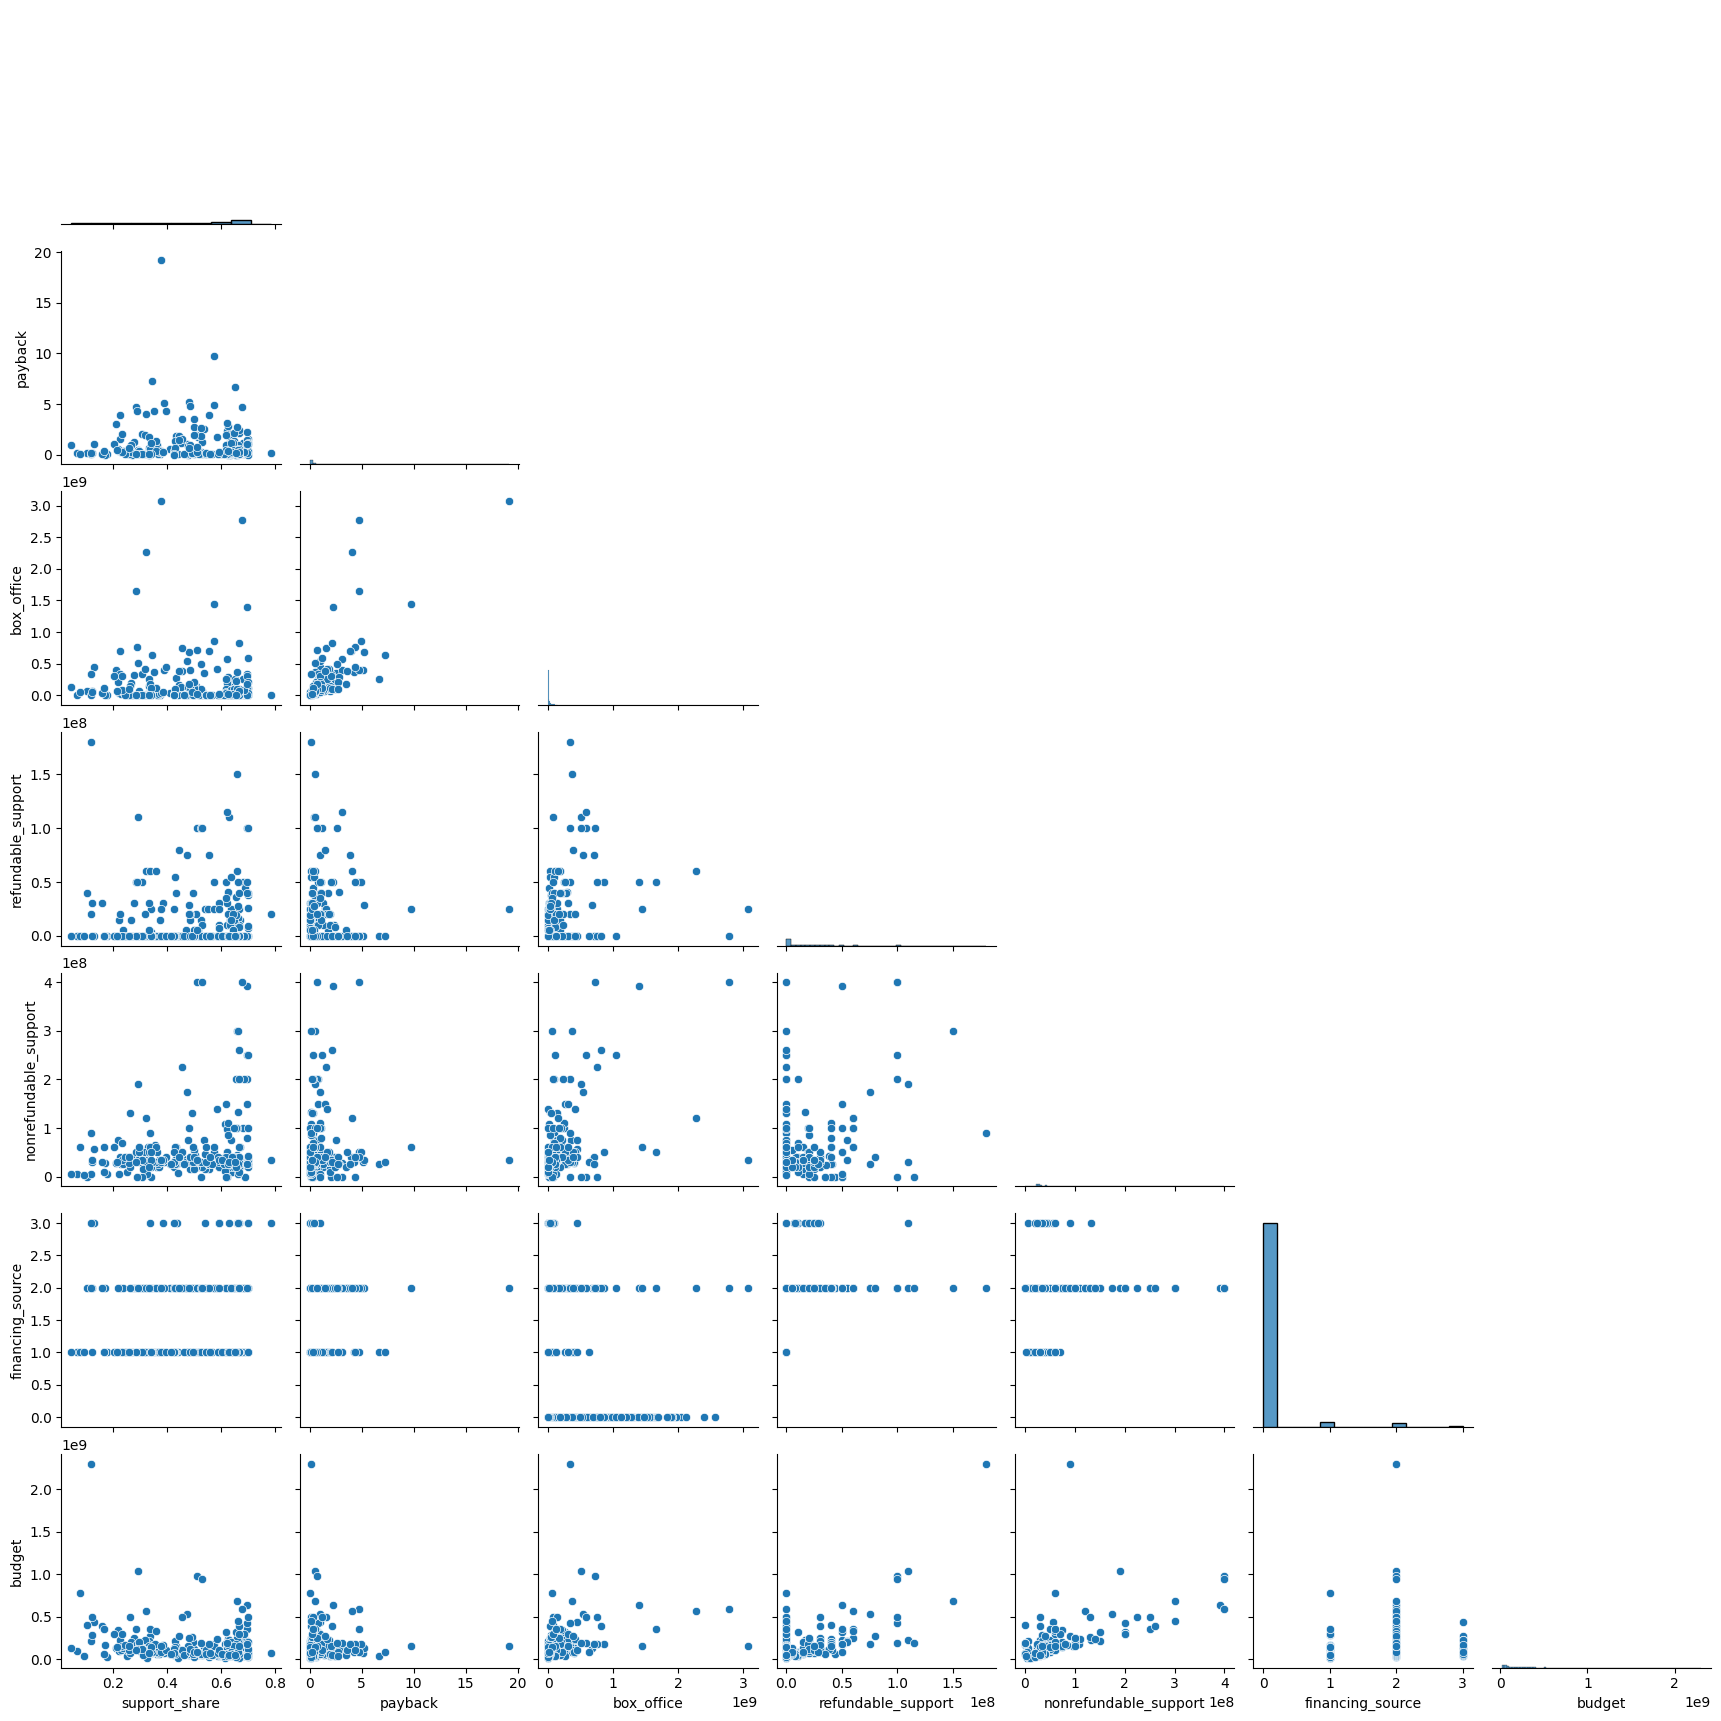

In [144]:
# матрица диаграмм рассеяния наиболее интересных для анализа метрик
sns.pairplot(df_numeric(
df[['support_share','payback','box_office','refundable_support','nonrefundable_support','financing_source','budget']]),
             corner=True); plt.show()

Матрица диаграмм релевантна с матрицей коэффициентов корреляции. Ничего нового не выявлено.

## Общий вывод

**Предобработка**
1) Анализ сделан на базе двух файлов, объединённых в 1 датафрейм по номеру прокатного удостоверения. Преобразованы типы данных: 'puNumber','show_start_date','ratings'. Число пропусков уменьшино на 2%. Удалено из df 338 строк частичных дубликатов (строк идентичных за исключением номера прокатного удостоверения и точной даты выхода). <br>
2) В категориальных столбцах удалены в ячейках все лишние пробелы (не менее 2109). Это позволило сократить кол-во неявных дубликатов.<br>
3) Удалены 878 значений кассовых сборов менее 200 т.руб.<br>
4) Добавлены новые столбцы: год, главный режиссёр, основной жанр, доля гос.поддержки.<br>

**Анализ**<br>
5) Топ 3 уникальных значений в категориальных характеристиках (наиболее часто встречаемые):<br>
* 'type' - художественный, анимационный, прочие;
* 'age_restriction' - 16+,18+,12+;
* 'financing_source' - Мин.культуры, Фонд кино, Мин.культ+Ф.кино;
* 'film_studio' - Уорнер Бразерс, Мосфильм, Юниверсал Пикчерз;
* 'production_country' - США, Россия, Франция;
* 'director' (без мультипликаторов) - Стивен Содерберг, Ридли Скотт, Тиль Швайгер;
* 'director' - О.Семёнова, А.Миронов, Е.Салабай;
* 'producer' - С.Сельянов, П.Смирнов, Джейсон Блум;
* 'genres' - драма, комедия, триллер.

6) Заметный спад выпущенных фильмов в кинопрокат в 2017г. Возможно отложенная реакция на кризис 2014-2015г.<br>
7) Данные о сборах начали фиксироваться в 2013-2014 годах. По всем фильмам больше всего информации было в 2017г. - 68%; по российским в 2016г. - 49%; по зарубежным в 2018 - 87%. Учёт по зарубежным фильмов выше.<br>
8) Максимальная сумма сборов в 2016г. Основную кассу делают зарубежные фильмы. Российские фильмы достигли пика в 2018г. Наиболее частый кассовый сбор в российском кинопрокате 1 млн. руб. Медиана 8 млн.р., среднее - 100 млн. руб.<br>
9) Больше всего денег собрали фильмы "16+"."12+" и "6+" - примерно на одном уровне."18+" - на предпоследнем месте.\
10) Фильмы с наибольшим медианным сбором - детские "6+". Следующие места периодически чередуются.\
11) Топ 5 жанров по сборам: фантастика, мультфильм, фэнтези, боевик, комедия.\
12) Спад доли гос.поддержки в 2017-ом. \
13) Самая большая гос.поддержка была в 2019г. в общей сумме около 5 млрд.руб. Государство чаще оказывает невозвратную финансовую поддержку, чем возвратную. Медиана безвозвратной поддержки 30 млн. руб.; с обязательством возврата - 25 млн.руб.<br>
14) В большей части фильмы с гос.поддержкой не окупаются. Медиана к-нта окупаемости 0,23. В 2017 пик окупаемости 0.44.\
15) Судя по рейтингу фильмы с гос.поддержкой меньше нравятся зрителям, чем фильмы не финансируемые государством.\
16) Взаимосвязь метрик.
* Тип - слабая связь с долей гос.поддержки, жанром, режиссёром.
* Киностудия, продюссер, режиссёр - средняя связь.
* Гос.поддержка, бюджет, источник финансирования - средняя положительная корреляция; логично для исследуемого df, так как данные собираются гос.учреждением и практически не содержат информацию о бюджете фильмов без гос.поддержки.
* Бюджет и сборы - слабая положительная корреляция.
* Слабая отрицательная корреляция между бюджетом и долей гос.поддержки. Следовательно государство не вкладывается полностью в высокобюджетные фильмы (есть определённый лимит, которые стараются не превышать).
* Очень слабая отрицательная корреляция между долей гос.поддержки и рейтингом, сборами, окупаемостью. То есть участие государства отрицательно влияет на продукт. Связано с тем, что государтство чаще вкладывается либо в пропагандистские, либо просветительские проекты, которые мало интересны широкому кругу. <br>

**Рекомендации**
* уменьшить финансирование/выпуск пропагандистких фильмов милитаристкой направленности (если что-то пропагандировать то - светлое, доброе, вечное);
* снизить государственный контроль и цензуру в кинопроизводстве;
* больше сотрудничать (оказывать поддержку) с признанными в мире российскими режиссёрами;
* больше оказывать поддержку молодым талантам (с минимальным цензурированием);
* в целях выбора жанра перспективных съёмок обратить внимание на топ-5 жанров.